# 1 Basic definitions and operations



https://primer-computational-mathematics.github.io/book/c_mathematics/linear_algebra/

We define a column vector $\mathbf{x}$ with a bold lowercase letter (often $ \vec{x} $ and $ \underline{x} $ are used, especially in writing) and a matrix $A$ with an uppercase letter, such that

$ \mathbf{x}: \quad n \text{ column vector } \in \mathbb{C}^n$

$ A: \quad m \times n \text{ matrix } \in \mathbb{C}^{m \times n}, $
    
where $m$ is the number of rows and $n$ is the number of columns in a matrix. The vector $\mathbf{x}$ therefore has entries $x_i$ and the matrix $A$ has entries $a_{ij}$:

$$ \mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}, \qquad
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}.
$$

Unless explicitly stated otherwise, all vectors in this notebook are column vectors. We will normally write row vectors as the transpose of column vectors:

$$ \begin{pmatrix} x_1 & x_2 & \cdots & x_n \end{pmatrix} = \mathbf{x}^T. $$

## Transpose and conjugate transpose

The **transpose** is an operator that swaps the rows and columns of a matrix, so that $A^T$ is an $n \times m$ matrix with entries $a_{ji}$. Similarly, transposing a column vector results in a row vector, and vice versa. In general, for two matrices $A$ and $B$ of appropriate dimensions (i.e. we can add and/or multiply them - see below) and a scalar $\alpha$:

1. $(A + B)^T = A^T + B^T$
2. $(\alpha A)^T = \alpha(A^T)$
3. $(AB)^T = B^TA^T$
4. $(A^T)^T = A$

We also need to define **conjugate (Hermitian) transpose** of a matrix, denoted as $A^*$, $A^H$ and sometimes $A^\dagger$ (*dagger*), which is obtained by taking the transpose and the complex conjugate of each entry:

$$ A^* = (\overline{A})^T = \overline{(A^T)}. $$

Remember that a conjugate of a complex number $z$ changes the sign of the imaginary part: $\overline{z} = \overline{a + ib} = a - ib$. If a matrix is real taking its conjugate leaves it unchanged, of course, since the imaginary part is zero.

Matrix $A$ is **symmetric** if $ A^T = A $ and is **hermitian** if $A^* = A$.

The main library for linear algebra in Python is Scipy, which builds on NumPy and NumPy's [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). NumPy does contain some linear algebra functions, sufficient for basic linear algebra needs.

In [1]:
import numpy as np

A = np.array([[1. + 3.j, 2. - 4.j, 3.],
              [4., 5. + 1.j, 6. - 1.j],
              [7. - 2.j, 8. + 4.j, 9. - 1.j]])

print('A = \n', A, '\n')
print('A transpose = \n', A.T)
print('A conj. transpose = \n', A.T.conj())

A = 
 [[1.+3.j 2.-4.j 3.+0.j]
 [4.+0.j 5.+1.j 6.-1.j]
 [7.-2.j 8.+4.j 9.-1.j]] 

A transpose = 
 [[1.+3.j 4.+0.j 7.-2.j]
 [2.-4.j 5.+1.j 8.+4.j]
 [3.+0.j 6.-1.j 9.-1.j]]
A conj. transpose = 
 [[1.-3.j 4.-0.j 7.+2.j]
 [2.+4.j 5.-1.j 8.-4.j]
 [3.-0.j 6.+1.j 9.+1.j]]


## Matrix addition and scalar multiplication

Addition (and subtraction) on two matrices (or two vectors) is defined only for matrices with equal dimensions (we say they are *conformable for adition*), as it is performed by entrywise sum.  The resulting matrix will therefore have the same dimensions as the matrices being added. For example,

$$ \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix} + \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{pmatrix} = \begin{pmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{pmatrix}, $$

or more generally

$$ C = A + B, \text{ where } c_{ij} = a_{ij} + b_{ij}.$$

**Properties:** matrix addition is a commutative and an associative operation, i.e. $A + B = B + A$ and $A + (B + C) = (A + B) + C$.

A scalar $\alpha$ multiplying a matrix multiplies each entry of the matrix:

$$ B = \alpha A, \text{ where } b_{ij} = \alpha a_{ij}. $$

**Properties:** this operation is associative and distributive: $(\alpha \beta) A = \alpha (\beta A)$ and $\alpha(A + B) = \alpha A + \alpha B$.

In [2]:
A = np.arange(4.).reshape(2,2)

print('A = \n', A)
print('3*A = \n', 3*A)
print('3*A - A = \n', 3*A - A)

A = 
 [[0. 1.]
 [2. 3.]]
3*A = 
 [[0. 3.]
 [6. 9.]]
3*A - A = 
 [[0. 2.]
 [4. 6.]]


## Matrix-vector multiplication


Let us consider a general matrix-vector multiplication, which is really just a special case of matrix-matrix multiplication.

$$ \mathbf{b} = A\mathbf{x}, $$

where $A \in \mathbb{C}^{m \times n}$. $A$ and $\mathbf{x}$ are conformable for multiplication iff the number of rows of $\mathbf{x}$ is the same as the number of columns of A, i.e. $\mathbf{x}$ has to be an $n \times 1$ vector. The number of rows of $\mathbf{b}$ will be equal to the number of rows of $A$ and the number of columns will be the same as in $\mathbf{x}$. That means that a product of a matrix and a vector is an $m \times 1$ vector.

The map $\mathbf{x} \mapsto A\mathbf{x}$ is [linear](https://en.wikipedia.org/wiki/Linear_map) as it satisfies

1. $A(\mathbf{x} + \mathbf{y}) = A\mathbf{x} + A\mathbf{y}$
2. $A(\alpha \mathbf{x}) = \alpha A \mathbf{x}$

The entries of $\mathbf{b}$ can be calculated with:

$$ b_i = \sum_{j=1}^n a_{ij}x_j,$$

where $i = 1, \dots, m$. Instead of looking at individual entries $a_{ij}$, let us consider the columns of A (vectors), which we denote as $\mathbf{a}_j \in \mathbb{C}^m$. In *column picture* representation, matrix-vector multiplication can be written as

$$ \mathbf{b} = \sum_{j=1}^n x_j\mathbf{a}_j, $$

or

$$ \begin{pmatrix}
 \\ b \\ \\
\end{pmatrix} = x_1 \begin{pmatrix}
 \\ a_1 \\ \\
\end{pmatrix} + x_2 \begin{pmatrix}
 \\ a_2 \\ \\
\end{pmatrix} + \cdots + x_n \begin{pmatrix}
 \\ a_n \\ \\
\end{pmatrix}, $$

where $\mathbf{a}_1$ is the first column of A and so on. We say that $\mathbf{b}$ is *a linear combination of the columns of $A$*. Let us explain geometrically what this means.

### Example: Geometric interpretation

Consider the following 2-D matrix-vector multiplication which we can easily solve using what was shown above.

$$ \mathbf{b} = \begin{pmatrix}
2 & 1 \\ -2 & 3 \end{pmatrix}
\begin{pmatrix} 1.5 \\ 2 \end{pmatrix} =
1.5 \begin{pmatrix} 2 \\ -2 \end{pmatrix} +
2 \begin{pmatrix} 1 \\ 3 \end{pmatrix} =
\begin{pmatrix} 3 \\ -3 \end{pmatrix} +
\begin{pmatrix} 2 \\ 6 \end{pmatrix} =
\begin{pmatrix} 5 \\ 3 \end{pmatrix}$$

We see that the vector $\mathbf{b}$ is a sum of scaled columns (vectors) of the  matrix, where the scaling factors come from the entries of the vector.

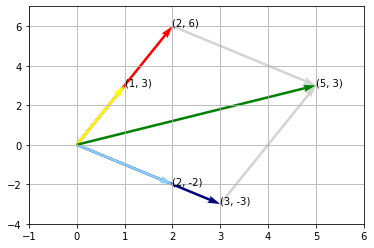

In [3]:
import matplotlib.pyplot as plt


def add_vct(vct, pos=[0, 0], c=None, label=True):
    u, v = vct
    x, y = pos

    plt.quiver(x, y, u, v, color=c, angles='xy', scale_units='xy', scale=1)

    if label == True:
        plt.annotate((x + u, y + v), (x + u, y + v))


add_vct([3, -3], c='navy')
add_vct([2, 6], c='red')
add_vct([2, -2], c='lightskyblue')
add_vct([1, 3], c='yellow')

add_vct([2, 6], pos=[3, -3], c='lightgray', label=False)
add_vct([3, -3], pos=[2, 6], c='lightgray', label=False)

add_vct([5, 3], c='g')

plt.xlim([-1, 6])
plt.ylim([-4, 7])
plt.grid()
plt.show()

## Matrix-matrix multiplication


Finally, let us consider a multiplication of two matrices. Two matrices are conformable for multiplication if the number of columns of the first matrix is equal to the number of columns of the second matrix. That is,

$$ C = AB, $$

where $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix. As in the previous section, that means that the resulting $C$ has dimensions $m \times p$ matrix, i.e. it has the same number of rows as $A$ and number of columns as $B$:

$$ (m \times n) \times (n \times p) = (m \times p) $$

The entries of $C$ can be calculated from entries of $A$ and $B$:

$$ c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}. $$

**Properties.** For $A$, $B$ and $C$ of conformable dimensions:
1. $AI$ = $IA$ = $A$, where $I$ is the identity matrix
2. associative: $A(BC) = (AB)C$
3. distributive: $A(B + C) = AB + AC$
4. **not** commutative: $AB \neq BA $

In general, matrix multiplication is not commutative, i.e. $ AB \neq BA $. We therefore need to consider separately what it means to *left-multiply* and *right-multiply* a matrix by another matrix.

Let us explore that by thinking about matrix multiplication in a different way. Let us think of $C = AB$ as $B$ right-multiplying $A$. If we were to explicitly calculate $C$ using the above formula, we could convince ourself that $C = AB$ can be written as:

$$ c_j = A b_j = \sum_{k=1}^m b_{kj}a_k, $$

where $c_j$ is the jth column of $C$ and $a_k$ is the kth column of $A$. From the above formula we see that the columns of $C$ are a linear combination of columns of $A$, with the coefficients coming from $B$.

We can also think of $C = AB$ as matrix $A$ left-multiplying matrix $B$. Thought this way,

$$ c_i = b_i A = \sum_{k=1}^m a_{ik}b_k, $$

where $c_i$ is the ith row of $C$ and $b_k$ is the kth row of $B$. Now rows of $C$ are a linear combination of rows of $A$. Of course, all of the above views will give the same result.

To help visualise left- and right- multiplication described here, the reader is encouraged to visit [DZone](https://dzone.com/articles/visualizing-matrix). The below examples should additionally help with understanding this.

### Example: rows x matrix, matrix x columns

Consider a simple matrix multiplication:

$$C = AB = \begin{pmatrix} 2 & 1 \\ -2 & 3 \end{pmatrix}
\begin{pmatrix} 5 & 0 \\ 2 & 4 \end{pmatrix} $$

Let us look at the *row picture* first and focus on the first row of $A$, $a_1 = (2, 1)$. Following the formula from above, this means that the first row of $C$ will be $2 \times$ first row of $B + 1 \times$ second row of $B$. So the first row of $C$ is $ = 2(5, 0) + 1(2, 4) = (12, 4)$. Similarly, the second row of $C$ is $ = -2(5, 0) + 3(2, 4) = (-4, 12)$.

We should get the same product if we do column multiplication. For easier notation and formatting, here we will represent column vectors as transposed row vectors. The first column of $B$ is $(5, 2)^T$, which means that the first column of $C$ will be $5 \times$ first column of $A + 2 \times$ second column of $A$. The first column of $C$ is therefore $ = 5(2, -2)^T + 2(1, 3)^T = (12, -4)^T$. Similarly for the second column of $C$, which is $ = 0(2, -2)^T + 4(1, 3)^T = (4, 12)^T.$

$$AB = \begin{pmatrix} 2 & 1 \\ -2 & 3 \end{pmatrix}
\begin{pmatrix} 5 & 0 \\ 2 & 4 \end{pmatrix} =
\begin{pmatrix} 12 & 4 \\ -4 & 12 \end{pmatrix} = C$$

Let us use Python to verify that the result is indeed correct.

In [4]:
A = np.array([[2, 1],
              [-2, 3]])
B = np.array([[5, 0],
              [2, 4]])

print('A @ B = \n', A @ B)

A @ B = 
 [[12  4]
 [-4 12]]


### Example: Permutations


Matrix permutations are esentially acts of rearranging the entries of a matrix. We permute a matrix $A$ by left- or right-multiplying it with a permutation matrix. A [permutation matrix](https://en.wikipedia.org/wiki/Permutation_matrix) $P$ is a square matrix where every row and every column has a single 1 element and 0's elsewhere.

Consider a simple $3 \times 3$ matrix $A$:

$$ A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}. $$

Let us think how we would, for example, swap the first and third row of this matrix. Remember that if we want to act on the rows of $A$ we need to left-multiply it by another matrix. In this case, this will be the permutation matrix $P$ which also has to be $3 \times 3$. This is how we would achieve this:

$$ PA =  
\begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix} =
\begin{pmatrix} 7 & 8 & 9 \\ 4 & 5 & 6 \\ 1 & 2 & 3 \end{pmatrix} = B,$$

where $B$ is the product of $PA$. What does the first row of $P$ do? The first row of $P$ is $(0, 0, 1)$ and it means that the first row of $B$ will be the following linear combination of the rows of $A$: $0(1, 2, 3) + 0(4, 5, 6) + 1(7, 8, 9)$. That is, the first row of $B$ will be just the last row of $A$. The second row of $P$ is $(0, 1, 0)$ and it means that the second row of $B$ will be equal to the second row of $A$, i.e. it will remain unchanged. The last row of $P$ is $(1, 0, 0)$ which means that the last row of $B$ will be equal to the first row of $A$.

Let us now imagine we want to swap the first and second columns of $A$. Remember that now we have to right-multiply since we are acting on the columns of $A$. We will again provide the solution and then explain how we got to it.

$$ AP =
\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}
\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix} =
\begin{pmatrix} 2 & 1 & 3 \\ 5 & 4 & 6 \\ 8 & 7 & 9 \end{pmatrix} = B$$

We now need to look at the columns of $P$. If we want the first column of $B$ to be equal to the second column of $A$, the first column of $P$ must be $(0, 1, 0)^T$. Then the first column of $B$ is the following linear combination of the columns of $A$: $0(1, 4, 7)^T + 1(2, 5, 8)^T + 0(3, 6, 9)^T = (2, 5, 8)^T$, where we again denote column vectors as the transposed row vectors for easier formatting. Similarly for the second and third column.

What if we wanted to swap the rows or columns back to their original positions? This requires us to find an *inverse matrix* of the permutation matrix, which would 'reverse' the permutation. In this case, the inverse is easily found: to swap the first and second row back, we simply need to swap them again! That means that the permutation matrix is equal to its inverse, $P^{-1} = P$. More about inverse matrices later.

### Example: Inner and outer product

Let us consider another special case of matrix-matrix multiplication: multiplication of two vectors $\mathbf{u} \in \mathbb{R}^m$ and $\mathbf{v} \in \mathbb{R}^n$.
The dot product of two vectors $\mathbf{u}$ and $\mathbf{v}$ is often called the *inner product* and is written like this in vector notation:

$$ \mathbf{u}^T \mathbf{v} = \begin{bmatrix}
u_1 & u_2 & \cdots & u_m \end{bmatrix} \begin{bmatrix}
\\ \mathbf{v} \\ \\
\end{bmatrix} = \sum_{i=1}^m u_i v_i. $$

>Note that here $m$ must be equal to $n$. The product is a scalar, so it is also called a *scalar product*. A special type of inner product $\mathbf{u}^T \mathbf{u}$ is called the *Euclidean norm* or Euclidean distance, and it represents the *length* of a vector $\mathbf{u}$. We cover this and other norms in more detail in another notebook.

Similarly for the **outer product**, but now the product will be a matrix whose columns are simply linear combinations of $\mathbf{u}$.

$$ \mathbf{u} \mathbf{v}^T =
\begin{bmatrix} \\ \mathbf{u} \\ \\ \end{bmatrix}
\begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix} =
\left[ \begin{array}{c|c|c|c|c} \\ v_1 \mathbf{u} & v_2 \mathbf{u} & \cdots & v_n \mathbf{u}\\ \\ \end{array} \right]$$

Let us check this in Python with vectors $u = (1, 2, 3)^T$ and $v = (4, 5, 6)^T$.

In [5]:
u = np.array([1, 2, 3]).reshape(-1, 1)
v = np.array([4, 5, 6]).reshape(-1, 1)

print('u = \n', u)
print('v = \n', v )

print('\nu.T @ v = \n', u.T @ v)
print('\nu @ v.T = \n', u @ v.T)

u = 
 [[1]
 [2]
 [3]]
v = 
 [[4]
 [5]
 [6]]

u.T @ v = 
 [[32]]

u @ v.T = 
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


---

## Linear transformations


Let us think what linear transformations (or maps or functions) actually mean. A function $f(\cdot)$ represents our linear transformation, it means that

$$ f(\mathbf{x} + \mathbf{y}) = f(\mathbf{x}) + f(\mathbf{y}) \\
f(\alpha \mathbf{x}) = \alpha f(\mathbf{x}),$$

for any vectors $\mathbf{x}, \mathbf{y}$, for example, and any scalar $c$. *Almost everything we encountered in this notebook is a linear transformation!* In fact, matrices are examples of linear maps. We can think of matrix-vector multiplication $A \mathbf{x} = \mathbf{b}$ as a vector $\mathbf{x}$ being transformed into a new vector $\mathbf{b}$. Let us look at a few examples of that.


## Rotation

---

A *rotation matrix* for counterclockwise rotation with angle $\varphi$ is defined as:

$$ \begin{pmatrix} \cos \varphi & -\sin \varphi \\ \sin \varphi & \cos \varphi \end{pmatrix}. $$

Our mapping is then:

$$ \begin{pmatrix} \cos \varphi & -\sin \varphi \\ \sin \varphi & \cos \varphi \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} x \cos \varphi - y \sin \varphi \\ x \sin \varphi + y \cos \varphi \end{pmatrix},$$

or equivalently:

$$ (x, y) \mapsto (x \cos \varphi - y \sin \varphi, x \sin \varphi + y \cos \varphi). $$



## Shearing

---

The horizontal and vertical shearing transformation matrices are defined, respectively, as:

$$ \begin{pmatrix} 1 & \tan \psi \\ 0 & 1 \end{pmatrix}, \quad \begin{pmatrix} 1 & 0 \\ \tan \psi & 1 \end{pmatrix}, $$

where $\psi$ is the shear angle. And the respective mappings are:

$$ (x, y) \mapsto (x + y \tan \psi, y) \\
(x, y) \mapsto (x, x \tan \psi + y).$$



## Squeezing

---

The squeezing transformation matrix is defined as:

$$ \begin{pmatrix} k & 0 \\ 0 & 1/k \end{pmatrix}, \quad k \in \mathbb{R}.$$

The mapping is:

$$ (x, y) \mapsto (kx, y/k). $$

### Example with Python:

Let us apply these three mappings to unit vectors $(1, 0)^T, (0, 1)^T$. We will rotate by $\varphi = 30^\circ$, squeeze by a factor $k = 1.3$ and shear horizontally by $\psi = 45^\circ$ from the vertical.

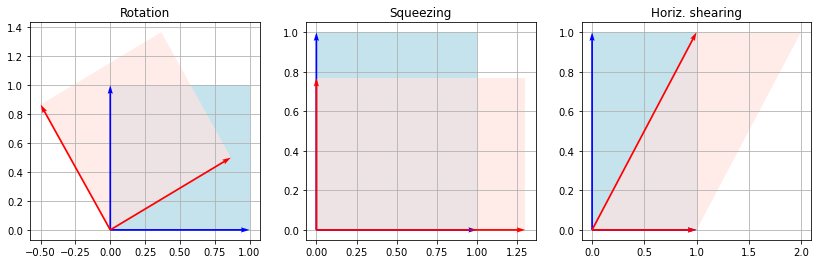

In [6]:
from matplotlib.patches import Polygon

def add_vcts(v1, v2, color='k', fcolor=None):
    ax.quiver(v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color=color, zorder=10)
    ax.quiver(v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color=color, zorder=10)
    ax.add_patch(Polygon([np.zeros(2,),v1,v1+v2,v2], fc=fcolor, alpha=0.7))

titles = ['Rotation', 'Squeezing', 'Horiz. shearing']

# unit vectors
i = np.array([1,0])
j = np.array([0,1])

# rotation
phi = np.pi / 6
R = np.array([[np.cos(phi), -np.sin(phi)],
              [np.sin(phi), np.cos(phi)]])
# squeezing
k = 1.3
S = np.array([[k, 0], [0, 1/k]])

# shearing
psi = np.pi / 4
P = np.array([[1, np.tan(psi)], [0, 1]])

fig = plt.figure(figsize=(14,4))
for n in range(1, 4):
    ax = fig.add_subplot(1, 3, n)
    ax.set_title(titles[n-1])
    ax.grid(True)

    if n == 1:
        i_ = R @ i
        j_ = R @ j
    elif n == 2:
        i_ = S @ i
        j_ = S @ j
    else:
        i_ = P@i
        j_ = P@j

    add_vcts(i, j, 'b', 'lightblue')
    add_vcts(i_, j_, 'r', 'mistyrose')

## General transformation

Now consider a general matrix
$\begin{pmatrix} a & b \\ c & d \end{pmatrix}.$
And let us think about how it transform the unit vectors  

$$ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} a \\ c \end{pmatrix}, \qquad
\begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} b \\ d \end{pmatrix}.$$

The matrix transformed our unit vectors into new vectors which are just the columns of the matrix. Let us plot this using Python:

From the output figure below.... we could find that the area of the red parallelogram to be equal to $ad - bc$. This is equal to the cross product of the vectors $(a, c)^T$ and $(b, d)^T$, which are the columns of our matrix. We actually define the determinant of the matrix as the area of this parallelogram - but more on this in another notebook.

(-0.2, 2.2)

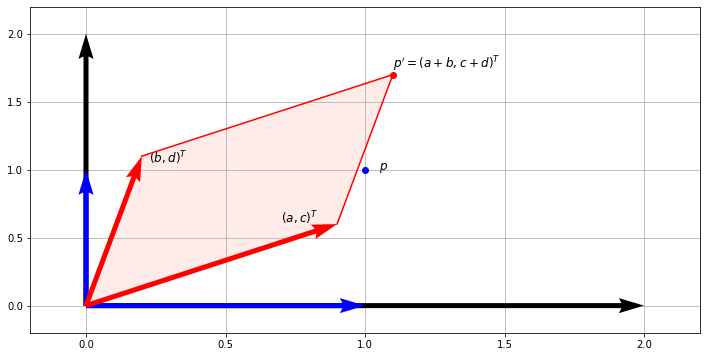

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.grid(True)

ax.quiver(2,0, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
ax.quiver(0,2, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)

ax.quiver(1,0, angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax.quiver(0,1, angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# basis functions
i = np.array([1,0])
j = np.array([0,1])

# transform them
A = np.array([[0.9,0.2],[0.6,1.1]])
i_ = A @ i
j_ = A @ j

# some borders
add_vcts(i_, j_, color='r', fcolor='mistyrose')
ax.plot([i_[0],i_[0]+j_[0]], [i_[1],i_[1]+j_[1]], color='r', zorder=10)
ax.plot([j_[0],i_[0]+j_[0]], [j_[1],i_[1]+j_[1]], color='r', zorder=10)

p = i+j  # point (1, 1)
p_ = A @ p  # transform p

# plot the points
ax.plot(p[0], p[1], 'bo')
ax.plot(p_[0],p_[1],'ro')

# add some text
ax.text(p[0] + 0.05,p[1], "$p$", fontsize=12)
ax.text(p_[0],p_[1]+0.05, "$p'=(a+b,c+d)^T$", fontsize=12)
ax.text(i_[0]-0.2,i_[1]+0.01, "$(a,c)^T$", fontsize=12)
ax.text(j_[0]+0.025,j_[1]-0.05, "$(b,d)^T$", fontsize=12)

ax.set_xlim(-0.2,2.2)
ax.set_ylim(-0.2,2.2)

# 2 Systems of linear equations

https://primer-computational-mathematics.github.io/book/c_mathematics/linear_algebra/




Consider a general system of $m$ linear equations with $n$ unknowns (variables):

$$ a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2 \\
    \vdots \qquad \qquad \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m, $$

where $x_i$ are unknowns, $a_{ij}$ are the coefficients of the system and $b_i$ are the RHS terms. These can be real or complex numbers.

Almost every problem in linear algebra will come down to solving such a system. But what does it mean to solve a system of equations?

## Solution of the system

Solving a system of equations means to find *all* n-tuples $(x_1, x_2, ..., x_n)$ such that substituting each one back into the system gives exactly those values given on the RHS, in the correct order. We call each such tuple a solution of the system of equations.

To solve such a system we will use basic arithmetic operations to transform our problem into a simpler one. That is, we will transform our system into another **equivalent system**. We say that two systems of equations are equivalent if they have the same set of solutions. In other words, the transformed system is equivalent to the original one if the transformation does not cause a solution to be lost or gained.

Three such transformations (sometimes called *elementary row operations*) of a system of linear equations that result in an equivalent system are:

1. Swapping any two equations of the system
2. Multiplying an equation of the system by any number different from 0
3. Adding an equation of the system multiplied by a scalar to another equation of the system

We will aim to use these transformations to eliminate certain unknowns from some equations. Ideally, we would like to reduce one equation to have only one unknown, which we can then simply solve for. Then we plug this value in other equations and so on. Let us demonstrate this on a couple of simple examples.

---
### Example: Unique solution


Consider the following system of 3 linear equations involving 3 unknowns $x, y, z$:

$$ x + z = 0 \\
y - z = 1 \\
x + 2y + z = 1 $$

Being a system of 3 equations and 3 unknowns, we should be able to solve it. We start by noticing that if we subtract the 1st equation from the 3rd we would be left with an equation involving only $y$. That is, we need to use the transformation rule number 3. After doing that, we get the following equivalent system:

$$ x + z = 0 \\
y - z = 1 \\
2y = 1. $$

Now we can easily see from the 3rd equation that $y = 1/2$. Now we plug this value of $y$ into the 2nd equation and solve it for $z$. Then we plug the value of $z$ into the 1st equation and solve it for $x$. After doing that, we find that the only solution to the problem is a triplet $(1/2, 1/2, -1/2)$.

## Matrix equation

We can represent any system of linear equation in matrix form. The general $m \times n$ system from the beginning of this notebook can be represented as:

$$ A \mathbf{x} = \mathbf{b}, $$

where $A \in \mathbb{c}^{m \times n}$ is called a **coefficient matrix** with coefficients as entries $a_{ij}$ and $\mathbf{x}$ and $\mathbf{b}$ are vectors $\in \mathbb{R}^n$.

The same transformation rules from before still apply to a systems represented in matrix form, where each row is one equation. Since these transformations are performed on both the LHS and RHS of equations it is convenient to write the system using an **augmented matrix** which is obtained by appending $\mathbf{b}$ to $A$:

$$ (A | \mathbf{b}) =
\left ( \begin{array}{cccc|c}
a_{11} & a_{12} & \cdots & a_{1n} & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & b_2 \\
    & \vdots & & \vdots & \\
a_{m1} & a_{m2} & \cdots & a_{mn} & b_m \end{array} \right ).$$

To avoid confusing $A$ and $\mathbf{b}$, they are often separated by a straight line, as shown above.

### Example: No solution

Consider a very similar problem to the one in the previous example, which only differs in the sign of $a_{33}$ in the 3rd equation:

$$ x + z = 0 \\
y - z = 1 \\
x + 2y - z = 1 $$

Let us first write it in matrix-form $A \mathbf{x} = \mathbf{b}$:

$$ \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & -1 \\
1 & 2 & -1 \end{pmatrix}
\begin{pmatrix} x \\ y \\ z \end{pmatrix} =
\begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix} $$

Or using an augmented matrix:

$$ \left ( \begin{array}{ccc|c}
1 & 0 & 1 & 0 \\
0 & 1 & -1 & 1 \\
1 & 2 & -1 & 1
\end{array} \right ) $$

We will again aim to eliminate certain coefficients from equations. For example, we could eliminate the first coefficient in the 3rd row by subtracting the 1st row from the 3rd row. By doing that, we get the equivalent system:

$$\begin{aligned}
    \left ( \begin{array}{ccc|c}
1 & 0 & 1 & 0 \\
0 & 1 & -1 & 1 \\
1 & 2 & -1 & 1
\end{array} \right )
    \hspace{-0.5em}
    \begin{align}
        &\phantom{I}\\
        &\phantom{II} \\
        &L_3 - L_1 \to L_3
    \end{align}
    \Rightarrow
\left ( \begin{array}{ccc|c}
1 & 0 & 1 & 0 \\
0 & 1 & -1 & 1 \\
0 & 2 & -2 & 1
\end{array} \right )
\end{aligned} $$

Now we want to eliminate the second coefficient in the 3rd equation. To do that, we use the third transformation rule again to subtract $2 \times$ 2nd equation from the 3rd:

$$\begin{aligned}
\left ( \begin{array}{ccc|c}
1 & 0 & 1 & 0 \\
0 & 1 & -1 & 1 \\
0 & 2 & -2 & 1
\end{array} \right )
    \hspace{-0.5em}
    \begin{align}
        &\phantom{I}\\
        &\phantom{II} \\
        & L_3 - 2L_1 \to L_3
    \end{align}
    \Rightarrow
\left ( \begin{array}{ccc|c}
1 & 0 & 1 & 0 \\
0 & 1 & -1 & 1 \\
0 & 0 & 0 & -1
\end{array} \right )
\end{aligned} $$

Let us look at the third equation: $0 = -1$. What this equation is telling us is that if a solution exists, that solution would be such that $0 = -1$. Since this is obviously not true, we conclude that there is no solution of this system of equations. Or, more precisely, we found that the solution set of this system is an **[empty set](https://en.wikipedia.org/wiki/Empty_set)**.

## Vector equation

Remember that a product of matrix-vector multiplication is a linear combination of the columns of the matrix. We can therefore write $A\mathbf{x} = \mathbf{b}$ as:

$$ x_1 \begin{pmatrix} \\ a_1 \\ \\ \end{pmatrix}
+ x_2 \begin{pmatrix} \\ a_2 \\ \\ \end{pmatrix}
+ \cdots + x_n \begin{pmatrix} \\ a_n \\ \\ \end{pmatrix}
= \begin{pmatrix} \\ b \\ \\ \end{pmatrix} $$

Therefore, solving $A \mathbf{x} = \mathbf{b}$ can be thought of as finding weights $x_1, ..., x_n$ such that the above is true.

## Triangular systems

Some special types of systems of linear equations can be solved very easily. An especially important type is a triangular system.

A square $n \times n$ matrix $A$ is a **lower triangular matrix** if $a_{ij} = 0$ for $i < j$. Similarly, we say that it is **upper triangular** if $a_{ij} = 0$ for $i > j$. For example,

$$\begin{pmatrix} 1 & 0 & 0 \\ 1 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix}, \quad
\begin{pmatrix} 0 & 0 & 0 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}, \quad
\begin{pmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{pmatrix}.$$

The first two matrices above are lower-triangular because $a_{12}=a_{13}=a_{23} = 0$ and the third one is upper-triangular because $a_{21}=a_{31}=a_{32}=0$.

A system of linear equations which has a triangular coefficient matrix is called a *triangular system*. If you look back at the examples above, you will see that the transformations performed were actually helping us reach a triangular form of the coefficient matrix. Indeed, often the easiest way to solve a system of linear equations will be to transform it into an equivalent triangular system.

### Example: Upper-triangular system

Here we will demonstrate why triangular systems of equations are very simple to solve. Consider the following upper-triangular system:

$$ \begin{pmatrix}
1 & -1 & 2 \\
0 & 2 & -1 \\
0 & 0 & 2 \end{pmatrix}
\begin{pmatrix} x \\ y \\ z \end{pmatrix} =
\begin{pmatrix} -1 \\ 3 \\ 2 \end{pmatrix} $$

Solving an $n \times n$ triangular system comes down to solving, in $n$ steps, one equation with one unknown. So we should be able to solve the above system in just 3 steps. We begin solving an upper-triangular system by solving the last equation, which in our case is the following equation with one unknown: $ 2z = 2 $. Clearly, $z=1$ and $z$ is no longer an unknown variable. Now we work our way up and solve the 2nd equation, plugging in our unique solution of $z$: $2y -z = 2y - 1 = 3$ which is again an equation with one unknown. We find that $y = 2$ which we then plug in the first equation: $ x - y + 2z = x - 2 + 2 = x = -1 $. We have successfully solved the system and we found that it has a unique solution $\mathbf{x} = (-1, 2, 1)$.

If the system is lower-triangular, we  start solving it from the 1st equation and work our way down to the last one.

### Trapezoidal matrix

We can generalise the idea of triangular matrices to non-square matrices. A non-square matrix with zero entries below or above the diagonal is called an upper or lower **trapezoidal matrix**. For example:

$$ \begin{pmatrix} 1 & 2 & 2 & 2 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 2\end{pmatrix}, \quad
\begin{pmatrix} 1 & 0 & 0 & 0 & 0 \\ 2 & 1 & 0 & 0 & 0 \\ 2 & 2 & 1 & 0 & 0 \end{pmatrix} $$

What can we say about such system of equations $A \mathbf{x} = \mathbf{b}$ where $A \in \mathbb{C}^{m \times n}$ and $\mathbf{x}$, $\mathbf{b} \in \mathbb{C}^n$? If $m < n$ there are fewer equations than there are unknowns so the system is **undertermined**. If $m > n$ there are more equations than unknown and the system is **overdetermined**.

#### Example: Underdetermined system

Let us consider the following system of 2 equations and 3 unknowns:

$$ x - y + 2z = -1 \\
2y - z = 3 $$

We begin from the 2nd equation since it involves less unknowns than the 1st equation: $ 2y - z = 3$. Here we have a choice of which variable to solve for, but we shall solve it for $y$ since it is the *leading variable* (first non-zero in the row). We find $y = (z + 3)/2$. $z$ is a *free variable*, which we introduce formally bellow, but it essentially means that $z$ can be any number $z \in \mathbb{C}$, say $z = t$. Substituting $y = (t + 3)/2$ into the 1st equation:

$$ x = y - 2z - 1 = (t + 3)/2 - 2t - 1 = -\frac{3t}{2} + \frac{1}{2} $$

Therefore our solution set in terms of $z$ is $\{(-\frac{3t}{2} + \frac{1}{2}, \frac{t + 3}{2}, t), t \in \mathbb{c}\}$.

## Existence and uniqueness of a solution

Let us think geometrically what it means for a system $A \mathbf{x} = \mathbf{b}$ to have a solution. Consider a simple system of linear equations:

$$ \begin{bmatrix} 2 & 3 \\ 1 & -4 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 7 \\ 3 \end{bmatrix}, $$

or, equivalently,

$$ 2x + 3y = 7 \\ x - 4y = 3. $$

Let us plot these two lines using Python:

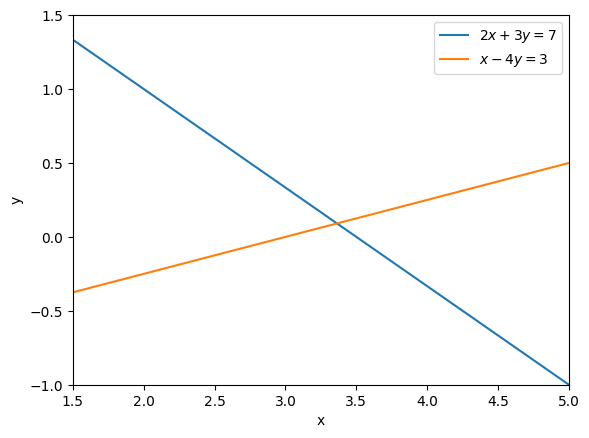

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0, 8, 10)
y1 = (7 - 2 * x1) / 3

x2 = np.linspace(0, 8, 10)
y2 = (x2 - 3) / 4

plt.plot(x1, y1, label=r"$2x + 3y = 7$")
plt.plot(x2, y2, label=r"$x - 4y = 3$")
plt.xlim(1.5, 5)
plt.ylim(-1, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

The two lines cross at only one point, at point $ (37/11, 1/11)$. This point is the *unique solution* of the system, $\mathbf{x} = (37/11, 1/11)$.

Let's now consider two systems of two equations whose graphs are parallel lines:

$$ 2x + 3y = 7  \qquad 2x + 3y = 7 \\ 2x + 3y = 5 \qquad 4x + 6y = 14$$

and let us plot them.

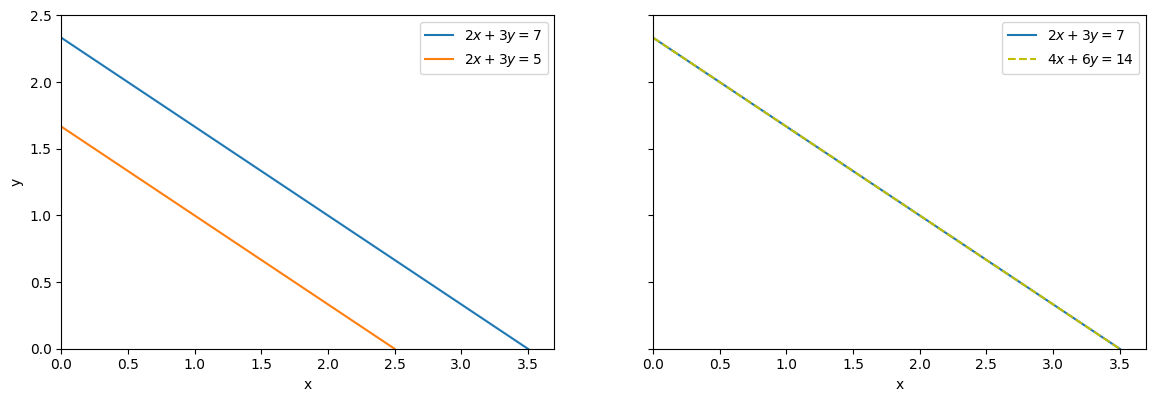

In [ ]:
x2 = np.linspace(0, 2.5, 10)
y2 = (5 - 2 * x2) / 3

fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

ax[0].plot(x1, y1, label=r"$2x + 3y = 7$")
ax[0].plot(x2, y2, label=r"$2x + 3y = 5$")
ax[0].set_aspect('equal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(loc='best')

y2 = (14 - 4 * x1) / 6
ax[1].plot(x1, y1, label=r"$2x + 3y = 7$")
ax[1].plot(x1, y2, 'y--', label=r"$4x + 6y = 14$")
ax[1].set_aspect('equal')
ax[1].set_xlabel('x')
ax[1].legend(loc='best')

plt.setp(ax, xlim=(0, 3.7), ylim=(0, 2.5))
plt.show()

In the first case, the lines never cross because they are parallel. Therefore, the system of equations has no solution. We can write $\mathbf{x} \in \emptyset$ (empty set).
The lines are parallel in the second case as well, but now they are on top of each other. There are an infinite number of solutions to that system - every point on the line $ y = (7-2x)/3 $ is a solution. We can then write that the solution set is $ \{ (t, \frac{7-2t}{3}), t \in \mathbb{R})\} $.

We can conclude that the existence and uniqueness of the solution of a linear system depends on whether the lines are parallel or not. Let us test this by finding the cross products of the row-vectors of the coefficient matrices. The row-vectors are normal to the lines given by the equations, so if the equation graphs are parallel, their normals will be too.

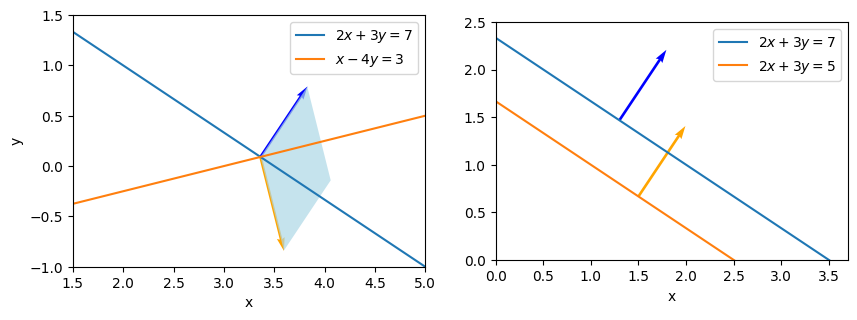

In [ ]:
from matplotlib.patches import Polygon

x2 = np.linspace(0, 8, 10)
y2 = (x2 - 3) / 4

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(x1, y1, label=r"$2x + 3y = 7$")
ax[0].plot(x2, y2, label=r"$x - 4y = 3$")
ax[0].quiver(37/11, 1/11, 2, 3, scale=15, angles='xy', color='b')
ax[0].quiver(37/11, 1/11, 1, -4, scale=15, angles='xy', color='orange')
vertices = np.array([[0, 0], [2, 3], [3, -1], [1, -4]])/4.3 + np.array([37/11, 1/11])
ax[0].add_patch(Polygon(vertices , facecolor='lightblue', alpha=0.7))
ax[0].set_xlim(1.5, 5)
ax[0].set_ylim(-1, 1.5)
ax[0].set_aspect('equal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(loc='best')


y2 = (5 - 2 * x2) / 3
ax[1].plot(x1, y1, label=r"$2x + 3y = 7$")
ax[1].plot(x2, y2, label=r"$2x + 3y = 5$")
ax[1].quiver(1.3, 4.4/3, 2, 3, scale=15, angles='xy', color='b')
ax[1].quiver(1.5, 2/3, 2, 3, scale=15, angles='xy', color='orange')
ax[1].set_xlim(0, 3.7)
ax[1].set_ylim(0, 2.5)
ax[1].set_aspect('equal')
ax[1].set_xlabel('x')
ax[1].legend(loc='best')

plt.show()

If $\mathbf{a_1} = (a_{11}, a_{12})$ is the first row-vector of a coefficient matrix and $\mathbf{a_2} = (a_{21}, a_{22})$, we can express their cross product as:

$$ ( \mathbf{a_1} \times \mathbf{a_2} ) = |\mathbf{a_1}| |\mathbf{a_2}| \sin(\vartheta) \hat{n}, $$

where $|\cdot|$ denotes the magnitude of the vector, $\vartheta$ is the angle between $\mathbf{a_1}$ and $\mathbf{a_2}$ and $\hat{n}$ is the unit normal vector to both vectors. We can see that the magnitude of the vector is equal to the area of a parallelogram with sides $|\mathbf{u}|$ and $|\mathbf{v}|$, with $\vartheta$ controlling how skewed it is. Such a parallelogram is marked by light-blue on the left figure. We also know from the previous notebook that the magnitude of the cross product of the two rows or columns of the matrix is given by the determinant of the matrix:

$$ |(a_{11}, a_{12}) \times (a_{21}, a_{22}) | = |(a_{11}, a_{21}) \times (a_{12}, a_{22}) | = \det \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}.$$

Let us then conclude, and we will justify this in the next notebooks, that a system of linear equations $A \mathbf{x} = \mathbf{b}$ will have a unique solution iff $\det A \neq 0$. If $\det A = 0$, the system either has infinitely-many solutions or no solutions at all.

## Gaussian elimination

Let us finally formally introduce what we have been trying to achieve in most examples above. **Gaussian elimination** (or row reduction) uses the three transformations mentioned before to reduce a system to **row echelon form**. A matrix is in row echelon form if:

- all zero rows (if they exist) are below all non-zero rows
- the **leading coefficient** (or **pivot**; the first non-zero entry in a row) is always strictly to the right of the leading coefficient of the row above it. That is, for two leading elements $a_{ij}$ and $a_{kl}$: if $i < k$ then it is required that $j < l$.

Notice that these conditions require reduced echelon form to be an upper-trapezoidal matrix. For example:

$$ \begin{pmatrix} 1 & 2 & 0 & 1 \\ 0 & 1 & 0 & 5 \\ 0 & 0 &2 & 2 \end{pmatrix}, \quad
\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}, \quad
\begin{pmatrix} 1 & -2 & 0 & 1 \\ 0 & 0 & 1 & 3 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{pmatrix}$$

The motivation behind performing Gaussian elimination is therefore clear, as we have demonstrated in the upper-triangular example why triangular systems are most convenient for solving systems of linear equations.

Let us consider again a general coefficient matrix $A \in \mathbb{C}^{m \times n}$ in $A \mathbf{x} = \mathbf{b}$:

$$ \begin{pmatrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\
a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\
 & \vdots & & \vdots & \\
a_{m1} & a_{m2} & a_{m3} & \cdots & a_{mn} \end{pmatrix} $$

What we want to achieve is to have all entries in the 1st column be 0 except for the first one. Then in the 2nd column all entires below the second entry should be 0. In the 3rd column all entries below the third entry should be 0, and so on. That means that we will have to use the 3rd transformation rule and subtract one equation from every one below it, multiplied such that the column entries will cancel:

$$
\begin{aligned}
    &\begin{pmatrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
    a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\
    a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\
     & \vdots & & \vdots & \\
    a_{m1} & a_{m2} & a_{m3} & \cdots & a_{mn} \end{pmatrix}
    \hspace{-0.5em}
    \begin{align}
        &\phantom{L_1}\\
        &L_2 - ^{a_{21}}/_{a_{11}}L_1 \to L_2 \\
        &L_3 - ^{a_{31}}/_{a_{11}}L_1 \to L_3 \\
        &\qquad \cdots \\
        &L_m - ^{a_{m1}}/_{a_{11}}L_1 \to L_1
    \end{align} \\ \\
    \Rightarrow \quad
    &\begin{pmatrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
    0 & \tilde{a_{22}} & \tilde{a_{23}} & \cdots & \tilde{a_{2n}} \\
    0 & \tilde{a_{32}} & \tilde{a_{33}} & \cdots & \tilde{a_{3n}} \\
     & \vdots & & \vdots & \\
    0 & \tilde{a_{m2}} & \tilde{a_{m3}} & \cdots & \tilde{a_{mn}} \end{pmatrix}
    \hspace{-0.5em}
    \begin{aligned}
        &\phantom{L_1}\\
        &\phantom{L_2} \\
        &L_3 - ^{a_{32}}/_{a_{12}}L_1 \to L_3 \\
        &\qquad \cdots \\
        &L_m - ^{a_{m2}}/_{a_{12}}L_1 \to L_1
    \end{aligned} \\ \\
    \Rightarrow \quad
    &\begin{pmatrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
    0 & \tilde{a_{22}} & \hat{a_{23}} & \cdots & \hat{a_{2n}} \\
    0 & 0 & \hat{a_{33}} & \cdots & \hat{a_{3n}} \\
     & \vdots & & \vdots & \\
    0 & 0 & \hat{a_{m3}} & \cdots & \hat{a_{mn}} \end{pmatrix} \\
    & \qquad \dots
\end{aligned} $$

And so on. Notice that these operations (transformations) are performed on entire rows, so the entries in the entire row change (here denoted by tilde and hat). That is why we need to be careful what row we add to other row since, for example, adding the first row to other rows later on would re-introduce non-zero values in the first column which we previously eliminated.

### Example

Consider the following system of 3 equations and 3 unknowns $x, y, z$:

$$ x - y + 2z = -1 \\ x + 2y - z = 2 \\ -x + y + z = 0 $$

Let us write it in augmented-matrix form and perform Gaussian eliminations.

$$\begin{aligned}
    &\left ( \begin{array}{ccc|c}
        1 & -1 & 2 & -1 \\
        1 & 2 & -1 & 2 \\
        -1 & 1 & 1 & 0 \end{array} \right )
    \hspace{-0.5em}
    \begin{align}
        &\phantom{L_1}\\
        &L_2 - L_1 \to L_2 \\
        &L_3 + L_1 \to L_3 \\
    \end{align} \\ \\
    \Rightarrow \quad
    &\left ( \begin{array}{ccc|c}
        1 & -1 & 2 & -1 \\
        0 & 3 & -3 & 3 \\
        0 & 0 & 3 & -1 \end{array} \right )
\end{aligned}$$

The one transformation on the 3rd equation eliminated both $x$ and $y$ unknowns from it so we did not have to perform another transformation. Now the system is reduced to an upper-triangular one, which we have encountered before and know how to solve. We begin from the last equation and back-substitute found values as we work our way up. We leave it to the reader to confirm that there is a unique solution $\mathbf{x} = (1/3, 2/3, -1/3)$.

## Transformations as matrices

Recall the example on permutations a few notebooks ago, where we wrote each permutation of rows or columns as a permutation matrix multiplying the original matrix. We can do the same thing with elementary row transformations.

Consider the same example from above, where we performed the following 2 transformations on the square $3 \times 3$ matrix $A$:

1. subtracted row 1 from row 2; $L_2 - L_1 \to L_2$
2. added row 1 to row 3; $L_3 + L_1 \to L_3$

We can write both of these transformations using **elementary matrices**:

$$ E_1 = \begin{pmatrix} 1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}, \quad E_2 = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix} $$

As in the example of permutations, left-multiplication by an elementary matrix $E$ represents elementary row operations, while right-multiplication represents elementary column operations. Our transformations are row operations, so we left multiply our original matrix:

$$ E_2 E_1 A =
\begin{pmatrix} 1 & -1 & 2 \\ 0 & 3 & -3 \\ 0 & 0 & 3 \end{pmatrix},$$

resulting in the same upper-triangular matrix as before. Note that the order in which we multiply is, in general, important.

## Using the inverse matrix to solve a linear system

Remember that an inverse of a square matrix $A$ is $A^{-1}$ such that $AA^{-1} = A^{-1}A = I$. Therefore, if we have a matrix equation $A \mathbf{x} = \mathbf{b}$, finding an inverse $A^{-1}$ would allow us to solve for all unknowns simultaneously, rather than in steps like in the examples above. Here is the idea:

$$ A\mathbf{x} = \mathbf{b} \\
\mbox{multiply both sides by} A^{-1} \\
I \mathbf{x} = A^{-1}\mathbf{b} \\
\mathbf{x} = A^{-1}\mathbf{b} $$

Finding the solution $\mathbf{x}$ is then reduced to a matrix-vector multiplication $A^{-1}\mathbf{b}$.

### Gauss-Jordan elimination

**Gauss-Jordan elimination** is a type of Gaussian elimination that we can use to find the inverse of a matrix. This process is based on reducing a matrix whose inverse we want to find to **reduced row echelon form**. For a matrix to be in reduced row echelon form it must satisfy the two conditions written above for row echelon forms and an additional condition:

- Each leading (pivot) element is 1 and all other entries in their columns are 0.

Examples of such matrices are:

$$ \begin{pmatrix} 1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}, \quad
\begin{pmatrix} 1 & 0 & 4\\ 0 & 1 & 3 \end{pmatrix}, \quad
\begin{pmatrix} 0 & 0 & 1 & 5 & 0 & 2 & 0 \\ 0 & 0 & 0 & 0 & 1 & 6 & 0 \\ 0 & 0 & 0 &0 &0 & 0 & 1 \end{pmatrix} $$

Now, let $A \in \mathbb{R}^{n \times n}$ be a square matrix whose inverse we want to find. We use it to form an augmented block matrix $[A | I]$. We perform elementary row transformations on this matrix such that we reduce $A$ to reduced row echelon form, which we will denote as $A_R$. In this process, the identity matrix $I$ on the right will be transformed to some new matrix $B$. If $A$ is invertible, we will have:

$$ [A | I] \Rightarrow [A_R | B] = [I | A^{-1}] $$

Let us think why this is. We showed above that elementary row operations can be represented as elementary matrices. Let there be $k$ such transformations needed to reduce $A$ to $A_R$. Then we can write:

$$ [A_R | B] = E_k E_{k-1} \dots E_2 E_1[A | I] $$

and let us denote $S = E_k E_{k-1} \dots E_2 E_1$, the product of all $k$ elementary matrices. Now,

$$ [A_R | B] = S[A | I] = [SA | SI] = [SA | S]$$

Therefore, if $A_R = I \Rightarrow I = SA$, meaning that $S = B$ is indeed the inverse of $A$.

If $A$ is not invertible, remember that it means that it is not full-rank. What that means is that $A_R$ will have at least one zero-row. In that case, $B \neq A^{-1}$.



#### Example: Calculating an inverse of a matrix

Let us find the inverse matrix of:

$$ A = \begin{bmatrix} 2 & 1 & 3 \\ 0 & 2 & -1 \\ 3 & -1 & 2 \end{bmatrix}. $$

We begin by forming an augmented matrix $[A|I]$ and begin reducing $A$ to reduced row echelon form.

$$\begin{aligned}
    {[A | I] =} \quad &\left [ \begin{array}{ccc|ccc}
        2 & 1 & 3 & 1 & 0 & 0 \\
        0 & 2 & -1 & 0 & 1 & 0\\
        3 & -1 & 2 & 0 & 0 & 1 \end{array} \right ]
    \hspace{-0.5em}
\end{aligned}$$



$$\begin{aligned}
    \sim \quad
    &\left [ \begin{array}{ccc|ccc}
        1 & 0 & 0 & -^1/_5 & ^1/_3 & ^7/_{15} \\
        0 & 1 & 0 & ^1/_5 & ^1/_3 & -^2/_{15}\\
        0 & 0 & 1 & ^2/_5 & -^1/_3 & -^4/_{15} \end{array} \right ]
    = [I | B]
\end{aligned}$$

We successfully found the inverse $A^{-1} = B$! Let us now use it to solve the system $A \mathbf{x} = \mathbf{b}$, where $\mathbf{b} = (2, 0, 1)^T$. As explained before, $A$ on the LHS is eliminated by multiplying both sides by $A^{-1}$ on the left, leaving:

$$ \mathbf{x} = A^{-1}\mathbf{b} =
\begin{pmatrix}
-^1/_5 & ^1/_3 & ^7/_{15} \\
^1/_5 & ^1/_3 & -^2/_{15} \\
^2/_5 & -^1/_3 & -^4/_{15}
\end{pmatrix}
\begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix} =
\begin{pmatrix} 1/15 \\ 4/15 \\ 8/15 \end{pmatrix} $$

The reader is encouraged to confirm this is the correct solution either through substitution into the original system or by using another solution method.

# 3 Theory



## Vector spaces

An n-dimensional vector space $V^n$ is a set of *all* n-tuples (sequences of $n$ scalars) $(x_1, x_2, \dots, x_n)$ which we call points or vectors, such that $V^n$ is closed under addition and scalar multiplication and these operations satisfy the following properties:

1. Associativity of addition: $\mathbf{x} + (\mathbf{y} + \mathbf{z}) = (\mathbf{x} + \mathbf{y}) + \mathbf{z}$
2. Commutativity of addition: $\mathbf{x} + \mathbf{y} = \mathbf{y} + \mathbf{x}$
3. There exists an element $\mathbf{0} \in V^n$, called the zero vector, such that $\mathbf{x} + \mathbf{0} = \mathbf{x}$ for all $\mathbf{x} \in V^n$
4. For all $\mathbf{x} \in V^n$ there exists an inverse element $-\mathbf{x} \in V^n$ such that $\mathbf{x} + (-\mathbf{x}) = \mathbf{0}$
5. Distributivity of scalar multiplication with respect to addition in $V^n$: $\alpha (\mathbf{x} + \mathbf{y}) = \alpha \mathbf{x} + \alpha \mathbf{y}$ for all $x, y \in V^n$ and $\alpha \in \mathbb{R}$
6. Distributivity of scalar multiplication with respect to addition in $\mathbb{R}$: $ (\alpha + \beta)\mathbf{x} = \alpha \mathbf{x} + \beta \mathbf{x} $
7. Compatibility of multiplication: $\alpha (\beta \mathbf{x}) = (\alpha \beta)\mathbf{x}$ for all $\mathbf{x} \in V^n$ and $\alpha, \beta \in \mathbb{R}$
8. Identity element of scalar multiplication: $1\mathbf{x} = \mathbf{x}$, where $1$ denotes the multiplicative identity in $\mathbb{R}$

For a set to be closed under addition, it means that $ \mathbf{x} + \mathbf{y} \in V^n$ for all $\mathbf{x}, \mathbf{y} \in V^n$. Or in words, a sum of two arbitrary vectors from $V^n$ is also in $V^n$. Similarly, for the set to be closed under scalar multiplication, $\alpha \mathbf{x} \in V^n$ for all $\alpha \in \mathbb{R}$ and $\mathbf{x} \in V^n$. These two operations allow us to freely scale our vectors and to form linear combinations of vectors while still remaining in the same vector space.

### Linear combination of vectors


Let $\mathbf{z} \in V^n$ and let $ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_k$ also be vectors in $V^n$. If we can write $\mathbf{z}$ as:

$$ \mathbf{z} = \alpha_1 \mathbf{u}_1 + \alpha_2 \mathbf{u}_2 + \dots + \alpha_k \mathbf{u}_k $$

for some scalars $\alpha_1, \alpha_2, \dots, \alpha_k$, then we say that $\mathbf{z}$ is a *linear combination* of a set of vectors $\{ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_k \}$.

We say that a set of vectors $\{ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_n \}$ is **linearly independent** iff vector $\mathbf{u}_i$, $i = 1, \dots, n$, *cannot* be written as a linear combination of the other vectors. More generally, a set of vectors $\{ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_n \}$ is linearly independent if

$$ \alpha_1 \mathbf{u}_1 + \alpha_2 \mathbf{u}_2 + \cdots + \alpha_n \mathbf{u}_n = \mathbf{0}$$

is possible only for $\alpha_i = 0$.

#### Example

Consider the following vectors in $\mathbb{R}^3$:

$$ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 2 \\ 2 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} -1 \\ 3 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix}.$$

Notice that the last 3 vectors can be written as a linear combination of the first 2 vectors. For example,

$$ \begin{bmatrix} -1 \\ 3 \\ 0 \end{bmatrix} =
-1 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 3
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}.$$

### Spanning set & Basis



Consider the following vectors in $V^n$ whose coordinates are all 0 except for one which equals 1:

$$ e_1 = (1, 0, 0, \dots, 0) \\
e_2 = (0, 1, 0, \dots, 0) \\
e_3 = (0, 0, 1, \dots, 0) \\
\vdots \\ e_n = (0, 0, 0, \dots, 1). $$

Every vector $\mathbf{x} = (x_1, x_2, \dots, x_n) \in V^n$ can be represented as:

$$ \mathbf{x} = x_1 e_1 + x_2 e_2 + \dots + x_n e_n. $$

In other words, every vector $\mathbf{x} \in V^n$ can be represented as a linear combination of a set of vectors $S = \{ e_1, \dots, e_n \}$. We say that $S$ is a **spanning set** of $V^n$. Equivalently, we can say that $V^n$ is *spanned* by a set of vectors $S$.

Furthermore, if $S$ is linearly independent it is also a *minimal spanning set* of $V^n$ (i.e. there is no subset of $S$ that spans $V^n$). We then call it a **basis** of $V^n$. Unlike in spanning sets, the order of vectors is important in a basis. So a basis is a *sequence* of $n$ linearly independent vectors that span a vector space $V^n$, such that every vector $\mathbf{x} \in V^n$ is a *unique* linear combination of vectors of the basis.

In summary, in $n$-dimensional vector space $V^n$ the following three statements are equivalent:

1. $(u_1, u_2, \dots, u_n)$ is a basis of $V^n$
2. $\{ u_1, u_2, \dots, u_n \}$ is a linearly independent set
3. $\text{span}(\{u_1, u_2, \dots, u_n\}) = V^n.$

#### Example: Minimal spanning set

Let a subspace $X \subset \mathbb{R}^3$ be spanned by vectors

$$ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 2 \\ 2 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} -1 \\ 3 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix},$$

and let $Y \subset \mathbb{R}^3$ be spanned by vectors

$$ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}.$$

Notice that vectors

$$\begin{bmatrix} 2 \\ 2 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} -1 \\ 3 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix}$$

can be written as a linear combination of the other 2 vectors. They are therefore redundant in the definition of a subspace $X$. Therefore, the only vectors which form a linearly independent set are

$$ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}.$$

We can then conclude that $X = Y$ and they include all vectors in $\mathbb{R}^3$ whose third coordinate is equal to 0.

#### Example: Basis

Let us show that vectors:

$$ a_1 = \begin{pmatrix} 1 \\ 1 \\ -1 \end{pmatrix}, \quad
a_2 = \begin{pmatrix} -1 \\ 2 \\ 1 \end{pmatrix}, \quad
a_3 = \begin{pmatrix} 2 \\ -1 \\ 1 \end{pmatrix} \quad $$

form a basis for $\mathbb{R}^3$. For these vectors to a basis, they need to form a linearly independent set in $\mathbb{R}^3$. We will test that by Gaussian eliminations on the $3 \times 3$ matrix $(a_1, a_2, a_3)$:

$$ \begin{pmatrix} 1 & -1 & 2 \\ 1 & 2 & -1 \\ -1 & 1 & 1 \end{pmatrix} \Rightarrow
\begin{pmatrix} 1 & -1 & 2 \\ 0 & 3 & -3 \\ -1 & 1 & 1 \end{pmatrix} \Rightarrow
\begin{pmatrix} 1 & -1 & 2 \\ 0 & 3 & -3 \\ 0 & 0 & 3 \end{pmatrix}$$

From the last matrix we see that the three columns are linearly independent, so $(a_1, a_2, a_3)$ indeed do form a basis for $\mathbb{R}^3$. If we wanted, we could continue to reduce the matrix to a reduced row echelon form (RREF) to get:

$$ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}. $$

From here it is completely obvious that the columns are linearly independent.

We could have approached this problem another way. We could have formulated it by saying that we wanted to prove that for any RHS $\mathbf{x} \in \mathbb{R}^3$ the system of equations

$$ \lambda_1 a_1 + \lambda_2 a_2 + \lambda_3 a_3 = \mathbf{x} $$

has a unique solution, where $\lambda_1, \lambda_2, \lambda_3$. The process is still be the same, as the solution of a system of linear equation is unique only if all columns are linearly independent.

#### Example: $\mathbb{R}^n$ vector space

We can envisage sets $\mathbb{R}^1, \mathbb{R}^2$ and $\mathbb{R}^3$ geometrically. For example, we think of triplets $(x_1, x_2, x_3)$ in $\mathbb{R}^3$ as points in the entire 3-D coordinate space with coordinates $x_1, x_2, x_3$. The standard basis of $\mathbb{R}^3$ is a set of vectors $\{ e_1, e_2, e_3 \}$ which we might denote as unit vectors $\hat{x}, \hat{y}, \hat{z}$.

For $n > 3$ we do not have a geometrical image of $\mathbb{R}^n$. For example, we can represent wind velocity $(v_1, v_2, v_3)$ at time $t$ in space with coordinates $(x, y, z)$ as a point $(v_1, v_2, v_3, t, x, y, z)$ in $\mathbb{R}^7$.

### Change of basis

Let us go back to a matrix-vector multiplication we considered at the end of the first notebook. Some may remember this figure:

<img src="linalgdata/chofbasis.png" width="400">

We considered a general matrix left-multiplying the basis vectors. Let us recall what we found:

$$ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} a \\ c \end{pmatrix}, \qquad
\begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} b \\ d \end{pmatrix}.$$

As suggested by the title, we can therefore consider matrix multiplication as a change of basis. Say we are multiplying $A \mathbf{u} = \mathbf{v}$. What this means is that the vector $\mathbf{v}$ is the vector $\mathbf{u}$ transformed in the basis formed by the columns of $A$.

## Range

**Range** (or image) of $A$, $\text{range}(A)$, is the set of vectors that can be expressed as $A \mathbf{x}$ for some $\mathbf{x}$. Recall that $A \mathbf{x}$ can be expressed as a linear combination of columns of $A$, so the range is also called the **column space**. Therefore, it is the *span* (set of all possible linear combinations) of its column vectors.

For example, if $\text{range}(A) = \mathbb{R}^3$, that means that every point in 3-space can be reached and can therefore be written as $A \mathbf{x}$.

## Rank

**Rank** of matrix $A$, $\text{rank}(A)$, is the dimension of the column space of $A$. It is equal to the number of linearly independent columns (or rows) of $A$.

An $m \times n$ matrix is *full rank* iff $\text{rank}(A) = \min(m, n)$, i.e. it has maximum possible rank. A matrix that does not have full rank is *rank deficient*.

## Null space

**Null space** of $A \in \mathbb{R}^{m \times n}$, $\text{null}(A)$, is the set of vectors $\mathbf{x}$ that are a solution of a homogeneous system of linear equations $A \mathbf{x} = \mathbf{0}$. Null space is a subspace of $\mathbb{R}^n$ of dimension $n - \text{rank}(A)$. Finding the null space of a matrix will therefore involve finding the rank of a matrix, which we obtain by performing Gaussian eliminations.

If we find a set of $n - \text{rank}(A)$ linearly independent vectors in $\text{null}(A)$ they will form a basis for $\text{null}(A)$. We can then express every vector in $\text{null}(A)$ as a linear combination of the basis vectors.

**Side note.** A non-homogeneous system of linear equations $A\mathbf{x} = \mathbf{b}$ can be equivalently written as $ A\mathbf{x} + A\mathbf{x}_h = \mathbf{b} + \mathbf{0}$, where $A\mathbf{x}_h = \mathbf{0}$ is a homogeneous system with solution $\mathbf{x}_h \in \text{null}(A)$, since $\mathbf{b} + \mathbf{0} = \mathbf{b}$. We can further simplify this by writing:

$$A\mathbf{x} + A\mathbf{x}_h = A(\mathbf{x} + \mathbf{x}_h) = \mathbf{b}. $$

This means that to any solution $\mathbf{x}$ of a non-homogeneous system we can add any vector $\mathbf{x}_h$ from the null space and get another solution of the system.

### Example 1

Consider a homogeneous system of linear equations $A \mathbf{x} = \mathbf{0}$ where $A \in \mathbb{R}^{4 \times 3}$ is the following:

$$ A = \begin{bmatrix}
1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ 10 & 11 & 15
\end{bmatrix} \overset{RREF}{\longrightarrow} \begin{bmatrix}
1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0
\end{bmatrix} = A_R, $$

where we have reduced $A$ to its RREF $A_R$. We know that the systems of equations with coefficient matrices $A$ and $A_R$ are equivalent, which means that they have the same set of solutions. This set of solutions is the null space. Here $A$ is full rank, i.e. $\text{rank}(A) = 3$. That means that the homogeneous system of equations above has a unique solution. Since $\mathbf{0}$ is always a solution, we conclude that this unique solution must be the null-vector $\mathbf{0}$. In other words, the solution set of $A\mathbf{x} = \mathbf{0}$ is the set $\text{null}(A) = \text{null}(A_R)$ = \{ \mathbf{0} \}.

### Example 2

Let $A$ be $\in \mathbb{R}^{5 \times 8}$ with its RREF $A_R$:

$$ A_R = \begin{bmatrix}
1 & 2 & 0 & 1 & -1 & 0 & 3 & 0 \\
0 & 0 & 1 & 1 & 3 & 0  & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1  & -2 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix} $$

$A_R$ has 4 non-zero rows, so $\text{rank}(A) = 4$. Since $n=8$ the system has infinitely many solutions and we know that $\text{dim}(\text{null}(A)) = n - \text{rank}(A) = 8 - 4 = 4$.

There are several ways we could find the null space. For computation by Gaussian elimination, the reader is encouraged to go through [this example](https://en.wikipedia.org/wiki/Kernel_(linear_algebra)#Computation_by_Gaussian_elimination). Another method, which we show below, is to explicitly write the coordinates $x_i$ of the solution $\mathbf{x}$ for $A \mathbf{x} = \mathbf{0}$. The augmented matrix with $A_R$ on the left part and $\mathbf{0}$ on the right is in this case:

$$ [A_R | \mathbf{0}] = \left [
\begin{array}{cccccccc|c}
1 & 2 & 0 & 1 & -1 & 0 & 3 & 0 & 0 \\
0 & 0 & 1 & 1 & 3 & 0  & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1  & -2 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{array} \right ] $$

From here we explicitly write the equations:

$$ x_1 + 2x_2 + x_4 - x_5 + 3x_7 = 0 \\
x_3 + x_4 + 3x_5 + x_7 = 0 \\
x_6 - 2x_7 = 0 \\
x_8 = 0$$

$x_2, x_4, x_5, x_7$ are free variables (notice that their indices match the index of their non-pivotal column, sometimes called free column), so we can parameterise above equations such that $x_2 = \alpha$, $x_4 = \beta$, $x_5 = \gamma$, $x_7 = \delta$, where $\alpha, \beta, \gamma, \delta \in \mathbb{R}$. We get:

$$ x_1 = -2\alpha - \beta + \gamma - 3\delta \\
x_3 = -\beta -3\gamma -\delta \\
x_6 = 2\delta$$.

The solution $\mathbf{x}$ is therefore:

$$ \mathbf{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8 \end{bmatrix} = \begin{bmatrix} -2\alpha - \beta + \gamma - 3\delta \\ \alpha \\ -\beta -3\gamma -\delta \\ \beta \\ \gamma \\ 2\delta \\ \delta \\ 0 \end{bmatrix}.$$

We can rewrite this as a linear combination of four vectors which form a basis of $\text{null}(A)$:

$$\mathbf{x} = \alpha \begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} -1 \\ 0 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} + \gamma \begin{bmatrix} 1 \\ 0 \\ -3 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + \delta \begin{bmatrix} -3 \\ 0 \\ -1 \\ 0 \\ 0 \\ 2 \\ 1 \\ 0 \end{bmatrix}, \quad \alpha, \beta, \gamma, \delta \in \mathbb{R}. $$

## Inverse of a matrix

Let $A$ be an $n \times n$ matrix. For another square matrix $B$ we say it is an *inverse* of $A$ if

$$ AB = BA = I. $$

If an inverse of $A$ exists, then it is unique. Let us prove this by contradiction, by saying that there exists another matrix $B'$ such that $AB' = B'A = I$. Then because of the associativity of matrix multiplication and multiplicative identity when multiplying by the identity matrix $I$:

$$ B' = B'I = B'(AB) = (B'A)B = IB = B. $$

Not all matrices have an inverse. If the inverse of $A$ exists, we denote it as $A^{-1}$.

**Properties of inverses.** For invertible matrices $A, B \in \mathbb{C}^{n \times n}$ and a scalar $\alpha \in \mathbb{C}$:

1. $\alpha A$ is invertible and $(\alpha A)^{-1} = \alpha^{-1} A^{-1}$
2. $AB$ is invertible and $(AB)^{-1} = B^{-1}A^{-1}$
3. $A^T$ is invertible and $(A^T)^{-1} = (A^{-1})^T$

### Invertible Matrix Theorem

The invertible matrix theorem generates a series of equivalent conditions for $A \in \mathbb{C}^{n \times n}$ to be invertible. Here we will name a few, all of which we will have covered in one of these notebooks.

For $A$ to be invertible, any (and hence all) of the following equivalent conditions must hold:

1. $A$ has an inverse $A^{-1}$
2. $\text{rank}(A) = n$
3. $\text{range}(A) = \mathbb{C}^n$
4. $\text{null}(A) = \{\mathbf{0}\}$; i.e. $A\mathbf{x} = 0$ iff $\mathbf{x} =\mathbf{0}$
5. $0$ is not an eigenvalue of $A$
6. $0$ is not a singular value of $A$
7. $\det (A) \neq 0$

#### Example: Rotation matrix

Consider a general 2-D rotation matrix:

$$ R = \begin{pmatrix} \cos \varphi & -\sin \varphi \\ \sin \varphi & \cos \varphi \end{pmatrix}. $$

Let us think geometrically and try to find the inverse of this matrix. When multiplying a vector $\mathbf{u}$, the product $R\mathbf{u} = \tilde{\mathbf{u}}$ is a vector rotated counterclockwise in the $xy$-plane by an angle $\varphi$, measured from the positive $x$ axis. An inverse of $R$, $R^{-1}$, has to be such that $ R^{-1}\tilde{\mathbf{u}} = \mathbf{u}$, i.e. it will act to rotate by exactly the same angle, but in the opposite direction. Therefore, we simply need to change the sign of $\varphi$:

$$ R^{-1} = \begin{pmatrix} \cos (-\varphi) & -\sin (-\varphi) \\ \sin (-\varphi) & \cos (-\varphi) \end{pmatrix}. $$

Recall that sine is an odd function ($ \sin(-\varphi) = -\sin \varphi$), while cosine is even ($ \cos (-\varphi) = \cos \varphi $):

$$ R^{-1} = \begin{pmatrix} \cos \varphi & \sin \varphi \\ -\sin \varphi & \cos \varphi \end{pmatrix} = R^T. $$

We see that the inverse $R^{-1}$ coincides with the transpose $R^T$.

## Determinant

A determinant of a square matrix is an important notion in linear algebra. Even though today determinants are exclusively used in matrix theory, they chronologically predate matrices, as they have multiple important properties. Some of them we will consider here.

The determinant of a matrix $A$ is denoted as $\det(A), \det A$ or $|A|$. Let us introduce the determinant by looking at smaller matrices, working our way up.

**1.** The determinant of a $1 \times 1$ matrix $a_{11}$ is equal to that number $a_{11}$.
**2.** The determinant of a $2 \times 2$ matrix is the number

$$ \det \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} =
a_{11}a_{22} - a_{12}a_{21},$$

which is the difference between the product of the diagonal elements and the product of the off-diagonal elements. Notice that the determinant of a $2 \times 2$ matrix is the area of the parallelogram bounded by its column-vectors.

<img src="linalgdata/parallelogram.png" width="300">

**3.** The determinant of a $3 \times 3$ matrix is the number:

$$ \left | \begin{array}{ccc} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{array} \right | =
a_{11} \left | \begin{array}{ccc} a_{22} & a_{23} \\ a_{32} & a_{33} \end{array} \right | -
a_{12} \left | \begin{array}{ccc} a_{21} & a_{23} \\ a_{31} & a_{33} \end{array} \right | +
a_{13} \left | \begin{array}{ccc} a_{21} & a_{22} \\ a_{31} & a_{32} \end{array} \right |.$$

Seemingly daunting, but in reality a very simple procedure - a $3 \times 3$ case of the *Laplace expansion* for determining determinants. We consider the entries $a_{ij}$ in the top row separately and use them to multiply its *minor*. A minor $M_{ij}$ is the determinant of a smaller square matrix obtained by cutting out the i-th row and j-th column where the top row entry $a_{ij}$ we are multiplying it by lies. For the $3 \times 3$ case, $i = 1$ and $j = 1, 2, 3$. Going from left to right, we alternate between adding and subtracting these (top row entry $\times$ minor) terms.

Laplace expansion is also called *cofactor expansion*: a **cofactor** $C_{ij}$ is obtained by including the correct sign (alternating addition and subtraction) of the minors. That is, $C_{ij} = (-1)^{i+j}M_{ij}$.

Alternatively, some may find the [Sarrus' scheme](https://en.wikipedia.org/wiki/Rule_of_Sarrus) more useful in remembering the above formula.

A generalisation of the 2-D parallelogram, the determinant of a $3 \times 3$ matrix is the volume of a parallelepiped bounded by the column vectors of the matrix $A$.

**4.** To calculate the determinant of even larger matrices, we can again use Laplace expansion.

**Properties of determinants.** For square matrices $A, B \in \mathbb{C}^{n \times n}$ and a scalar $\alpha \in \mathbb{C}$:

1. $|AB| = |A| |B|$
2. $|A^T| = |A|$
3. $|A^{-1}| = \frac{1}{|A|}$. Remember that a matrix is not invertible if its determinant is 0.
3. $| \alpha A | = \alpha ^n |A|$
4. $|A| = 0$ if $\text{rank}(A) < n$
5. $|A$ is equal to the product of eigenvalues of $A$. We will show this in a later notebook.
6. For a more comprehensive list visit [Wikipedia](https://en.wikipedia.org/wiki/Determinant#Properties_of_the_determinant)

## Adjugate matrix

An **adjugate** of a square matrix $A$ is the transpose of the cofactor matrix $C$ of $A$:

$$ \text{adj}(A) = C^T, $$

where the entries of $C$, $C_{ij}$ are cofactors calculated as described above. An adjugate matrix is useful for determining the inverse of small matrices with the following relation:

$$ A^{-1} = \frac{\text{adj}(A)}{|A|}. $$

#### Example: Inverse of a $2 \times 2$ matrix

Let us find the inverse of the following matrix $A \in \mathbb{R}^{2 \times 2}$ using the above formula:

$$ A = \begin{pmatrix} 3 & 1 \\ 4 & 2 \end{pmatrix} $$

The determinant is easily calculated: $|A| = 3 \times 2 - 1 \times 4 = 2$.

We calculate the cofactor matrix from $C_{ij} = (-1)^{i+j}M_{ij}$. For example, $C_{11} = M_{11}$, i.e. $M_{11}$ is the determinant of $A$ after removing the first row and column from it. Therefore, $M_{11} = |2| = 2$. Similarly for the other entries:

$$ \text{adj}(A) = C^T =
\begin{pmatrix} 2 & -4 \\ -1 & 3 \end{pmatrix}^T =
\begin{pmatrix} 2 & -1 \\ -4 & 3 \end{pmatrix}.$$

Plugging both back into the formula for the inverse:

$$ A^{-1} = \frac{1}{2} \begin{pmatrix} 2 & -1 \\ -4 & 3 \end{pmatrix} = \begin{pmatrix} 1 & -1/2 \\ -2 & 3/2 \end{pmatrix} $$

## Cramer's rule

Let $A = (a_1, a_2, ..., a_n) $ be a square matrix (real or complex) such that $ \det A \neq 0$. Then for all $\mathbf{b}$, the equation $A\mathbf{x} = \mathbf{b}$ has a unique solution $\mathbf{x}$. Furthermore, the coordinates $x_i$ of the solution $\mathbf{x}$ are given by the formula:

$$ x_i = \frac{\det(a_1, ..., a_{i-1}, b, a_{i+1}, ..., a_n)}{\det(a_1, ..., a_n)}, $$

where we swapped the ith column of $A$ with $\mathbf{b}$.

### Example: Solving a system of complex linear equations

Consider the following system of two equations and two unknowns:

$$ 2ix - y = 2 - i \\
3x - iy = 2i $$

which can be written as:

$$ A \mathbf{x} =
\begin{pmatrix} 2i & -1 \\ 3 & -i \end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix} 2 - i \\ 2i \end{pmatrix} = \mathbf{b}. $$

Let us find $x$ and $y$ using Cramer's rule. To find $x$ we need to substitute $\mathbf{b}$ in the 1st column of the matrix in the numerator:

$$ x = \frac{\left | \begin{array}{cc} 2 - i & -1 \\ 2i & -i \end{array} \right |}{\left | \begin{array}{cc} 2i & -1 \\ 3 & -i \end{array} \right |}
= -\frac{1}{5}$$

Now for $y$ we need to substitute $\mathbf{b}$ in the 2nd column in the numerator:

$$ y = \frac{\left | \begin{array}{cc} 2i & 2 - i \\ 3 & 2i \end{array} \right |}{\left | \begin{array}{cc} 2i & -1 \\ 3 & -i \end{array} \right |}
= \frac{-10 + 3i}{5} = -2 + \frac{3}{5}i$$

Therefore, the solution $\mathbf{x}$ is a couple $(-\frac{1}{5}, -2 + \frac{3}{5}i)$.

## Vector norms

Simply put, vector *norms* are a measure of vector length. We will often represent a dataset in the form of a vector, so having some kind of scalar measure for vectors will be very useful in solving many kinds of problems (e.g. regression).

A norm is a function $ \lVert \cdot \rVert : \mathbb{C}^m \to \mathbb{R} $ such that for all $ \mathbf{x}, \mathbf{y} \in \mathbb{C}^m $ and $ \alpha \in \mathbb{C} $:

1. $ \lVert \mathbf{x} \rVert \geq 0, $ with $ \lVert \mathbf{x} \rVert = 0 $ iff \( \mathbf{x} = \mathbf{0} $ ($\mathbf{x}\) is a *null-vector*),
2. $\lVert \alpha \mathbf{x} \rVert = | \alpha | \lVert \mathbf{x} \rVert$ (scaling a vector scales its norm by the same amount),
3. $\lVert \mathbf{x} + \mathbf{y} \rVert \leq \lVert \mathbf{x} \rVert + \lVert \mathbf{y} \rVert $ (triangle inequality).

The most common norm is **Euclidean norm**, which gives the length of the vector as the Euclidean distance from the origin (magnitude). This is perhaps our intuitive idea of vector length, a consequence of Pythagorean theorem (in n dimensions). For a vector $ \mathbf{x} \in \mathbb{R}^n $, the Euclidean norm is given by a square of a dot product of $\mathbf{x}$ with itself, which is the inner product we saw before:

$$ \lVert \mathbf{x} \rVert_2 = \sqrt{\mathbf{x}^T \mathbf{x}} = \sqrt{\sum\nolimits_{i=1}^n x_i^2}. $$

For a complex vector $\mathbf{z} \in \mathbb{C}^n$, we will often need to take a conjugate transpose - including now when defining Euclidean norm:

$$ \lVert \mathbf{z} \rVert_2 = \sqrt{\mathbf{z}^* \mathbf{z}} = \sqrt{\overline{z}_1 z_1 + \overline{z}_2 z_2 + \cdots + \overline{z}_n z_n}. $$

This is because now each of the additive terms $\overline{z}_i z_i$ is the squared modulus $|z_i|^2$, for $i = 1, ..., n$.

The Euclidean norm is also called the $L_2$-norm or simply 2-norm. It is part of a larger class of norms called **p-norms**. For a general vector $ \mathbf{x} \in \mathbb{C}^n $:

$$ \lVert \mathbf{x} \rVert_p = \left( \sum_{i=1}^n | x_i |^p \right)^{1/p}, \qquad p \geq 1. $$

Let us also consider the **taxicab norm** ($p = 1$) and the **infinity norm** ($\lim\limits_{p \to \infty} \lVert \mathbf{x} \rVert_p$). The $L_1$ norm is the sum of the absolute values:

$$ \lVert \mathbf{x} \rVert_1 = \sum_{i=1}^n | x_i |, $$

while the infinity norm is simply the maximum absolute element:

$$ \lVert \mathbf{x} \rVert_\infty = \max\limits_{i}|x_i|. $$

This is illustrated on the figure below, showing unit circles (set of all vectors of norm 1) in $\mathbb{R}^2$ in different p-norms. That is, a vector from the origin to any point situated on the circle has a norm of 1 calculated in the corresponding p-norm. Modified from [Wikipedia](https://en.wikipedia.org/wiki/Norm_(mathematics)).

<img src="linalgdata/norms.png">

### Examples

Let us consider a vector $\mathbf{x} = (3, -4)^T $. We can simply calculate the $L_1$, $L_2$ and infinity norms:

$$\lVert \mathbf{x} \rVert_1 = |3| + |{-4}| = 7 \\
\lVert \mathbf{x} \rVert_2 = \sqrt{|3|^2 + |{-4}|^2} = 5 \\
\lVert \mathbf{x} \rVert_\infty = \max(|3|, |{-4}|) = 4.$$

<img src="linalgdata/vectornorms2.png" style="width: 200px;">

While $\lVert \mathbf{x} \rVert_1$ is defined as the unique Euclidean distance between two points, $\lVert \mathbf{x} \rVert_1$ is not unique.

## Matrix norms

We could think of a $\mathbb{C}^{m \times n}$ matrix as a $\mathbb{C}^{mn}$ vector and apply the usual vector norms.

For example, the **Frobenius** matrix norm is an analogue of the Euclidean norm for vectors:

$$ \lVert A \rVert _F = \left ( \sum_{i=1}^{m} \sum_{j=1}^{n} | a_{ij} |^2 \right )^{1/2} $$

# 4 Eigenvalues and eigenvectors



To introduce eigenvalues and eigenvectors, let us begin with an example of matrix-vector multiplication. Consider the following square matrix $A \in \mathbb{R}^{2 \times 2}$ multiplying a vector $\mathbf{u}$:

$$ A \mathbf{u} =
\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}
\begin{pmatrix} 1 \\ 0 \end{pmatrix} =
\begin{pmatrix} 2 \\ 1 \end{pmatrix} $$

We see that the multiplication has rotated and extended the vector. Let us now consider a multiplication with a different vector $\mathbf{v}$:

$$ A \mathbf{v} =
\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}
\begin{pmatrix} 1 \\ 1 \end{pmatrix} =
\begin{pmatrix} 3 \\ 3 \end{pmatrix} =
3 \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

Now the product is a vector which is not rotated, but is only scaled by a factor of 3. We call such vectors **eigenvectors** - an eigenvector (or *characteristic vector*) of a square matrix $A$ is a vector which when operated on by $A$ gives a scalar multiple of itself. These scalars are called **eigenvalues** (or *characteristic values*). We can write this as $A \mathbf{v} = \lambda \mathbf{v}$, where $\mathbf{v}$ is an eigenvector and $\lambda$ is an eigenvalue corresponding to that eigenvector.

The above example has two eigenvectors: $\mathbf{v}_1 = (1, 1)^T$ and $\mathbf{v}_2 = (1, -1)^T$ with respective eigenvalues $\lambda_1 = 3$ and $\lambda = 1$. The figure below shows the effect of this transformation on point coordinates in the plane. Notice how the blue and purple vectors (which are parallel to eigenvectors) have their directions preserved, while every otherwise oriented vector (e.g. red vectors) are rotated.


source: [Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
```

Another way of representing this is by transforming a circle. We can think of a circle as a collection of points, each representing a vector from the origin.

Let us consider the effect of a transformation matrix $ D = \begin{pmatrix} 2 & 0.5 \\ 0.5 & 0.5 \end{pmatrix} $ on a circle.

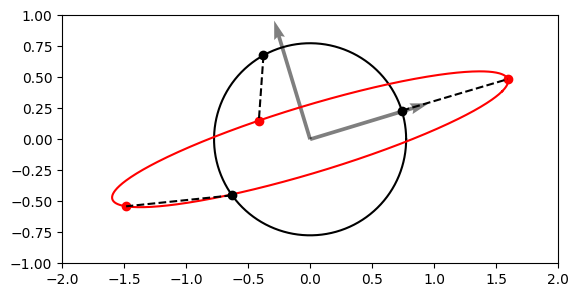

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


theta = np.linspace(0, 2*np.pi, 500)
r = np.sqrt(0.6)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

D = np.array([[2, 0.5],
              [0.5, 0.5]])
ell = D @ np.array([x1, x2])

fig, ax = plt.subplots(1)

ax.plot(x1, x2, '-k')
ax.plot(ell[0, :], ell[1, :], '-r')

for i in [24, 165, 299]:
    ax.plot(x1[i], x2[i], 'ko', zorder=10)
    ax.plot(ell[0, i], ell[1, i], 'ro')
    ax.plot([x1[i], ell[0, i]], [x2[i], ell[1, i]], '--k')

ax.quiver(0.95709203, 0.28978415, scale=4, alpha=0.5)
ax.quiver(-0.28978415, 0.95709203, scale=4, alpha=0.5)

ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)
ax.set_aspect(1)
plt.show()

The vectors now map an ellipse! Some vectors got rotated and squished, while some got rotated and elongated (scaled). However, there are some vectors which only got scaled and did not get rotated. These vectors are in the direction of the eigenvectors (grey arrows).

## Characteristic polynomial

How do we actually find eigenvectors and eigenvalues? Let us consider a general square matrix $A \in \mathbb{C}^{n \times n}$ with eigenvectors $\mathbf{x} \in \mathbb{C}^n$ and eigenvalues $\lambda \in \mathbb{C}$ such that:

$$ A \mathbf{x} = \lambda \mathbf{x}. $$

After subtracting the right hand side:

$$ A \mathbf{x} - \lambda \mathbf{x} = \mathbf{0}$$
$$ (A -\lambda I) \mathbf{x} = \mathbf{0} $$

Therefore, we are solving a homogeneous system of linear equations, but we want to find non-trivial solutions ($ \mathbf{x} \neq \mathbf{0} $). Recall from the section on null spaces that a homogeneous system will have non-zero solutions iff the matrix of the system is singular, i.e.

$$ \det(A - \lambda I) = 0. $$

This is a polynomial of degree $n$ with roots $\lambda_1, \lambda_2, \dots, \lambda_k$, $k \leq n$. This polynomial is termed the **characteristic polynomial** of $A$, where the roots of the polynomial are the eigenvalues. The eigenvectors are then found by plugging each eigenvalue back in $ (A -\lambda I) \mathbf{x} = \mathbf{0} $ and solving it.

### Example

Let us find the eigenvalues and eigenvectors of the following matrix $A \in \mathbb{R}^{3 \times 3}$:

$$ A = \begin{pmatrix} 2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2 \end{pmatrix} $$

The characteristic polynomial is:

$$ \det (A - \lambda I) =
\left | \begin{array}{ccc} 2 - \lambda & 1 & 0 \\ 1 & 2 - \lambda & 1 \\ 0 & 1 & 2 - \lambda \end{array} \right | \\
= (2 - \lambda)[(2-\lambda)^2 - 1] - 1 \\
= - \lambda^3 + 6 \lambda^2 - 10 \lambda + 4
= (2 - \lambda)(\lambda^2 - 4\lambda + 2) = 0$$

The roots of this polynomial, which are the eigenvalues, are //( \lambda_{1, 2, 3} = 2, 2 \pm \sqrt{2} //). Now to find the eigenvectors we need to plug these values into $(A - \lambda I)\mathbf{x} = 0$.

Consider first $\lambda = 2$:

$$ (A - \lambda I)\mathbf{x} =
\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix},$$

where $x_1$, $x_2$ and $x_3$ are entries of the eigenvector $\mathbf{x}$. The solution may be obvious to some, but let us calculate it by solving this system of linear equations. Let us write it with an augmented matrix and reduce it to RREF by swapping the 1st and 2nd row and subtracting the 1st row (2nd after swapping) from the last row:

$$ \left ( \begin{array}{ccc|c} 0 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{array} \right ) \longrightarrow \left ( \begin{array}{ccc|c} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{array} \right ). $$

As expected, there is no unique solution because we required before that $ (A - \lambda I) $ is singular. Therefore, we can parameterise the first equation: $x_1 = -x_3$ in terms of the free variable $x_3 = t, t \in \mathbb{R}$. We read from the second equation that $x_2 = 0$. The solution set is then $ \{ (-t, 0, t)^T, t \in \mathbb{R} \}$. If we let $t = 1$ then the eigenvector $\mathbf{x}_1$ corresponding to eigenvalue $ \lambda_1 = 2$ is $\mathbf{x}_1 = (-1, 0, 1)^T$. We do this because we only care about the direction of the eigenvector and can scale it arbitrarily.

We leave it to the readers to convince themselves that the other two eigenvectors are $ (1, \sqrt{2}, 1)^T $ and $ (1, -\sqrt{2}, 1)^T $.

### Example: Algebraic and geometric multiplicity


Now consider a matrix:

$$ A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix} \Rightarrow
A - \lambda I = \begin{pmatrix} 1-\lambda & 0 & 0 \\ 0 & 1-\lambda & 0 \\ 0 & 0 & -1 - \lambda \end{pmatrix}. $$

The characteristic equation is $\det(A - \lambda I) = (\lambda - 1)(\lambda - 1)(\lambda + 1) = (\lambda - 1)^2(\lambda + 1) = 0 $.

We see that the eigenvalues are $\lambda_1 = 1, \lambda_2 = -1$, where $\lambda_1$ is repeated twice. We therefore say that the **algebraic multiplicity**, which is the number of how many times an eigenvalue is repeated, of $\lambda_1$ is 2 and of $\lambda_2$ it is 1.

Let us now find the eigenvectors corresponding to these eigenvalues. For $\lambda_1 = 1$:

$$ (A - I)\mathbf{x} = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -2 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $$

The only constraint on our eigenvector is that $x_3 = 0$, whereas there are no constraints on $x_1$ and $x_2$ - they can be whatever we want. In cases like this, we still try to define as many linearly independent eigenvectors as possible, which does not have to be equal to the algebraic multiplicity of an eigenvalue. In our case, we can easily define two linearly independent vectors by choosing $x_1=1, x_2=0$ for one vector and $x_1=0, x_2=1$ for the other. Therefore, we managed to get two linearly independent eigenvectors corresponding to the same eigenvalue:

$$ \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}. $$

The number of linearly independent eigenvectors corresponding to an eigenvalue $\lambda$ is called the **geometric multiplicity** of that eigenvalue. The algebraic multiplicity of $\lambda$ is equal or greater than its geometric multiplicity. An eigenvalue for which algebraic multiplicity $>$ geometric multiplicity is called, rather harshly, a *defective* eigenvalue.

Now consider the non-repeated eigenvalue $\lambda_2 = -1$:

$$ (A - I)\mathbf{x} = \begin{pmatrix} -2 & 0 & 0 \\ 0 & -2 & 0 \\ 0 & 0 & 0 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}. $$

We have $x_1 = 0, x_2 = 0$ and there is no constraint on $x_3$, so now $x_3$ can be any number we want. For simplicity we choose it to be 1. Then the eigenvector is simply

$$ \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} $$

and we conclude that the geometric multiplicity of $\lambda_2$ is 1.

Finally, we check if our findings agree with that of NumPy in Python:

In [ ]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, -1]])

evals, evecs = np.linalg.eig(A)

print('A = \n', A)
print('Eigenvalues:', evals)
print('Eigenvectors: \n', evecs)

A = 
 [[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
Eigenvalues: [ 1.  1. -1.]
Eigenvectors: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Example: Fibonacci numbers

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number), often denoted by $F_n$, form a *Fibonacci sequence* where each number is the sum of the two preceding numbers. Let us write the beginning of that sequence, starting from 0 and 1:

$$ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, \dots $$

We can express this with the help of a Fibonacci matrix:

$$ \begin{pmatrix} F_n \\ F_{n-1} \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} F_{n-1} \\ F_{n-2} \end{pmatrix}.$$

This is a normal system of equations where the first one is what we are after $ F_n = F_{n-1} + F_{n-2} $ and the second one is trivial $F_{n-1} = F_{n-1}$. Let us plot some of these points $(F_n, F_{n-1})$:

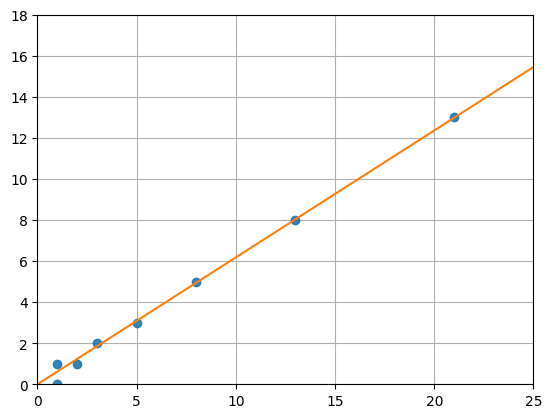

In [ ]:
points = np.array([[1, 0], [1, 1], [2, 1], [3, 2], [5, 3], [8, 5], [13, 8], [21, 13]])

plt.plot(points[:, 0], points[:, 1], 'o', alpha=0.9)
plt.plot([0, 46368], [0, 28657])
plt.xlim(0, 25)
plt.ylim(0, 18)
plt.grid(True)
plt.show()

It looks like these points plot very closely onto the line which we also plotted in the figure. As it turns out, that line is an eigenvector of the Fibonacci matrix. The eigenvalue corresponding to that eigenvector is $\approx 1.618034$, the *golden ratio*.

What that means is that each point on that line will get scaled by the golden ratio further along that line. For the first several elements of our sequence this will not be entirely precise because they do not lie exactly on that line. However, for $F_n$ where $n \to \infty$, this error goes to zero. Therefore, given a very large element in the Fibonacci sequence, say 196418, we can find the next term by multiplying it by the golden ratio: $196418 \cdot 1.618034 = 317811.002$. Indeed, the next element is $317811$.

But what if we do not start our sequence from 0 and 1? Our findings would still be the same, because the eigenvalues and eigenvectors are properties of our operator, in this case the Fibonacci matrix. So no matter how we start our sequence, the elements of that sequence will be spaced out by the eigenvalue along the eigenvector line. Let us quickly show this for a selection of different points which will all move closer onto the eigenvector after each transformation:

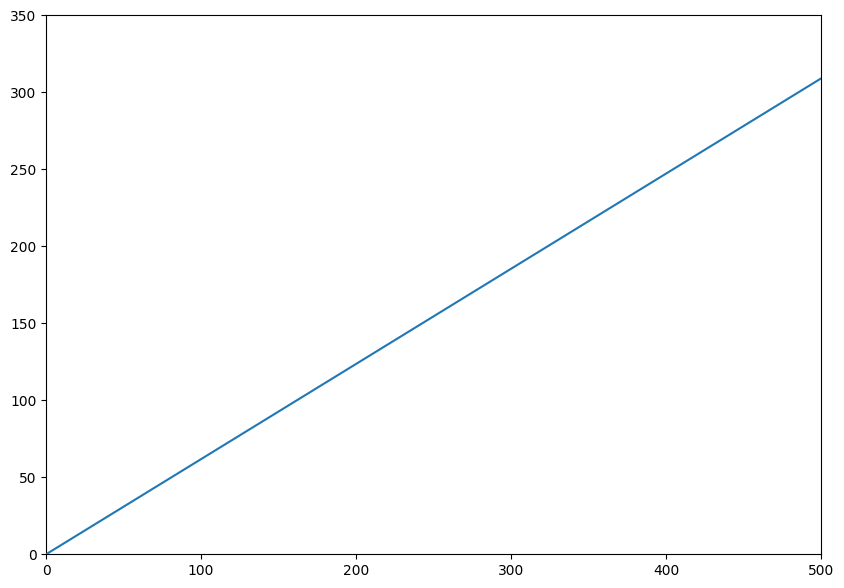

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


def init():
    point.set_data([], [])
    return point,

def update_plot(i):
    global points
    if i > 0:
        points = A @ points
    point.set_data(points[0, :], points[1, :])
    return point,


x = np.linspace(0, 100, 20)
x[0] += 0.001
y = np.linspace(0, 100, 20)
X, Y = np.meshgrid(x, y)

points = []

for i in range(len(X)):
    for j in range(len(X)):
        if Y[i, j] / X[i, j] <= 1:
            points.append([X[i, j], Y[i, j]])

points = np.array(points).T

A = np.array([[1, 1],
              [1, 0]])

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(xlim=(0, 500), ylim=(0, 350))
ax.plot([0, 46368], [0, 28657], zorder=10)
point, = ax.plot([], [], 'o', alpha = 0.9)

anim = FuncAnimation(fig, update_plot, init_func=init, frames=7, interval=1000, blit=True)
plt.show()

anim.save('fibonacci.mp4', writer='ffmpeg')

## Invariants


Consider the characteristic equation of a general $3 \times 3$ matrix:

$$ \det(A - \lambda I) =
\det \begin{bmatrix} a_{11} - \lambda & a_{12} & a_{13} \\ a_{21} & a_{22} - \lambda & a_{23} \\ a_{31} & a_{32} & a_{33} - \lambda \end{bmatrix} = 0.$$

It turns out that the determinant of the matrix of the operator does not depend on the choice of basis (see Cauchy-Binet theorem below), so we call it the determinant of the operator.

After evaluating the determinant, we could arrange our terms to get the following cubic characteristic equation:

$$ \lambda^3 - I_A \lambda^2 + II_A \lambda - III_A = 0, $$

where $I_A, II_A, III_A$ are defined as:

$$ \begin{align}
& I_A = tr A \\
& II_A = \frac{1}{2} \{ (tr A)^2 - tr(A^2) \} \\
& III_A = \det A.
\end{align} $$

$tr A$ is called the *trace* of $A$ and it is the sum of diagonal entries: //( tr A = a_{11} + a_{22} + a_{33} $. There are three roots (eigenvalues) of the characteristic equation, for which we can also find that:

$$ \begin{align}
& I_A = \lambda_1 + \lambda_2 + \lambda_3 \\
& II_A = \lambda_1 \lambda_2 + \lambda_2 \lambda_3 + \lambda_3 \lambda_1 \\
& III_A = \lambda_1 \lambda_2 \lambda_3.
\end{align} $$

The spectrum of a matrix is invariant to the change of basis, so we conclude that $I, II$ and $III$ are also invariants. We call them the principal tensor invariants. {note} The characteristic polynomial does not depend on the choice of basis in which we consider the matrix of an operator. See the Cauchy-Binet theorem below.


## Example

Let us use the above to find the eigenvalues of $ A = \begin{pmatrix} 1 & 4 \\ 3 & 5 \end{pmatrix}$. We know that:

$$ \begin{align}
& I_A = tr A = 1 + 5 = \lambda_1 + \lambda_2 \\
& III_A = \det A = 1 \cdot 5 - 3 \cdot 4 = \lambda_1 \lambda_2.
\end{align} $$

This is a system of two equations and two unknowns which we can easily solve to find that the eigenvalues are $\lambda_{1, 2} = -1, 7$.

## Similar matrices

Let $P$ be an invertible $n \times n$ matrix and $A, B$ also $n \times n$ matrices such that:

$$ B = P^{-1}AP. $$

Then we say that $A$ and $B$ are **similar**, where $P$ is simply a change of basis matrix. The matrices are not "similar" in the usual sense - they could look completely different, but they share some useful properties. Perhaps most notably, similar matrices have the same characteristic polynomial, meaning that their determinants, traces and eigenvalues are also the same. We say that they are *similarity invariants*. Let us show this.

[Cauchy-Binet theorem](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Binet_formula) states that for two square matrices $X$, $Y$:

$$ \det (XY) = \det X \cdot \det Y. $$

Now consider the characteristic polynomial of $B$:

$$ \begin{aligned} \det (B - \lambda I)
& = \det(P^{-1}AP - \lambda P^{-1}P) \\
& = \det(P^{-1}(A - \lambda I)P) \\
& = \det(P^{-1}) \det(A - \lambda I) \det P \\
& = \det(A - \lambda I)
\end{aligned}$$

Therefore, $A$ and $B$ have the same characteristic polynomial, so their eigenvalues must be equal as well. Note that two matrices with the same set of eigenvalues are in general *not* similar matrices.

## Motivation

Finding eigenvalues of a matrix is a problem of finding the roots of its characteristic polynomial. This works well for small matrices, but Galois theory states that there is no general solution for polynomials of degree 5 or higher. So we need to find other methods of finding eigenvalues and these methods cannot be exact - they must be iterative.

Recall that the eigenvalues of a triangular matrix (including diagonal matrices) are the diagonal entries, so we can simply read the eigenvalues from them. For example, [Schur decomposition](https://en.wikipedia.org/wiki/Schur_decomposition) expresses $A \in \mathbb{C}^{n \times n}$ as:

$$ A = QUQ^{-1},$$

where $Q$ is a unitary matrix and $U$ is upper triangular. Since this is a similarity transformation, $A$ and $U$ have the same eigenvalues which are the diagonal entries of $U$ since $U$ is triangular.

# 5 Eigenvalues


In [ ]:
# This cell just imports relevant modules

import numpy as np
# import pylab
from math import pi
from sympy import sin, cos, Function, Symbol, diff, integrate, matrices
# %matplotlib inline
import matplotlib.pyplot as plt

## Transformation matrices


In [ ]:
# Define the transformation matrix in Python using numpy.array
mD = np.array([[1.25, 0],
               [0, 0.8]])

# A list of coordinate vectors in the form [x,y].
# These are stored as numpy arrays so we can easily multiply them
# by the transformation matrix.
vCoordinates = [np.array([1, 0]),
               np.array([0, 1]),
               np.array([-1, 0]),
               np.array([0, -1])]

# Take each coordinate and transform it
for i in range(len(vCoordinates)):
    # We need to reshape the array so it is conformable
    # (i.e. it is of the right dimension for matrix-vector
    # multiplication). In this case, we need it to be 2 x 1.
    vCoordinates[i] = np.reshape(vCoordinates[i], (2,1))
    print(f"Transformed vCoordinates[{i}] = \n", mD @ vCoordinates[i])

sDet = np.linalg.det(mD)
sVolStrain = sDet - 1  # The volumetric strain

print("Determinant of D is: %f" % sDet)
print("This implies:")

if(sVolStrain == 1):
    print("No volume change")
elif(sVolStrain > 1):
    print("Increase in volume")
elif(sVolStrain > 0 and sVolStrain < 1):
    print("Decrease in volume")
else:
    print("No geological meaning")

Transformed vCoordinates[0] = 
 [[1.25]
 [0.  ]]
Transformed vCoordinates[1] = 
 [[0. ]
 [0.8]]
Transformed vCoordinates[2] = 
 [[-1.25]
 [ 0.  ]]
Transformed vCoordinates[3] = 
 [[ 0. ]
 [-0.8]]
Determinant of D is: 1.000000
This implies:
No geological meaning


## Eigenvalues of a $ 2 \times 2 $ matrix

**Slide 18**

A simple way of finding eigenvalues is to use the `numpy.linalg.eigvals` function:

In [ ]:
mA = np.array([[1,4],
               [1,1]])

sEigValues = np.linalg.eigvals(mA)
print("The eigenvalues of mA are: ", sEigValues)

The eigenvalues of mA are:  [ 3. -1.]


Alternatively, we could work out the characteristic polynomial for $ \lambda $ and then find the roots. We do that using the `np.poly(A)` function which computes $ \det ( A - \lambda I ) $ and returns a list of scalar coefficients `[X, Y, Z]` for the characteristic polynomial $ X \lambda^2 + Y \lambda + Z $

In [ ]:
sCharacteristicPoly = np.poly(mA)
print("The characteristic polynomial of mA is: (%d*lambda**2) + (%d*lambda) + (%d)"
      % (sCharacteristicPoly[0], sCharacteristicPoly[1], sCharacteristicPoly[2]))

# Finds the roots (in this case, these will be the eigenvalues)
sRoots = np.roots(sCharacteristicPoly)
print("The roots of the characteristic polynomial are: ", sRoots)

The characteristic polynomial of mA is: (1*lambda**2) + (-2*lambda) + (-2)
The roots of the characteristic polynomial are:  [ 3. -1.]


## Eigenvectors of a $2 \times 2$ matrix

**Slide 20**

A simple way of finding eigenvectors is to use the `numpy.linalg.eig` function. Note that this gives BOTH the eigenvalues in an array (say `sEigValues`) **AND** eigenvectors in a matrix data type (say `vEigVectors`).

In [ ]:
mA = np.array([[1,4],
               [1,1]])

# The i-th eigenvector, stored in the column vEigVectors[:,i],
# corresponds to the eigenvalue stored in sEigValues[i].
(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), "is:", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

Eigenvalue # 1 is: 3.0000000000000004
The corresponding eigenvector is:
 [0.89442719 0.4472136 ]
Eigenvalue # 2 is: -0.9999999999999996
The corresponding eigenvector is:
 [-0.89442719  0.4472136 ]


### Plotting function

Let us plot these eigenvectors:

In [ ]:
def plot_ellipse(mM):  #, horizontal_scale, vertical_scale):

    (sEigValues, vEigVectors) = np.linalg.eig(mM)

    # points (eigenvectors) on unit circle
    sp1 = np.array([vEigVectors[0][0], vEigVectors[1][0]])
    sp2 = np.array([vEigVectors[0][1], vEigVectors[1][1]])

    # transformed points (eigenvectors)
    tsp1 = mM @ sp1
    tsp2 = mM @ sp2

    # ellipse
    x0 = 0  # x-position of center
    y0 = 0  # y-position of center
    a = abs(sEigValues[0])  # radius on x-axis
    b = abs(sEigValues[1])  # radius on y-axis
    t_rot = np.arctan(vEigVectors[1][0]/vEigVectors[0][0])  # rotation angle

    t = np.linspace(0, 2*pi, 100)

    Ell = np.array([a*np.cos(t), b*np.sin(t)])  # points on an ellipse
    R_rot = np.array([[cos(t_rot), -sin(t_rot)],[sin(t_rot), cos(t_rot)]])  # 2-D rotation matrix
    Ell_rot = np.zeros((2, Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = R_rot @ Ell[:,i]  # rotated ellipse coordinates

    plt.figure(figsize=(12,12))
    plt.plot([0, sp1[0]], [0, sp1[1]], 'orange', label=f'eigenvector 1 = [{vEigVectors[0][0]:.2f}, {vEigVectors[1][0]:.2f}]', linewidth=5)
    plt.plot([0, tsp1[0]], [0, tsp1[1]], 'k--', label='eigenvalue 1 = {:.0f}'.format(sEigValues[0]))
    plt.plot([sp1[0], tsp1[0]], [sp1[1], tsp1[1]], 'ro')

    plt.plot([0, sp2[0]], [0, sp2[1]], 'c', label=f'eigenvector 2 = [{vEigVectors[0][1]:.2f}, {vEigVectors[1][1]:.2f}]', linewidth=5)
    plt.plot([0, tsp2[0]], [0, tsp2[1]], 'b--', label='eigenvalue 2 = {:.0f}'.format(sEigValues[1]))
    plt.plot([sp2[0], tsp2[0]], [sp2[1], tsp2[1]], 'bo')

    plt.plot(np.cos(t), np.sin(t), 'k', label='unit circle')
    plt.plot(x0+Ell_rot[0,:], y0+Ell_rot[1,:], 'g', label='transformed unit circle')

    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

    ang = np.allclose(sp1 @ sp2, 0)
    if ang == True:
        print("The eigenvectors are orthogonal")
    else:
        print("The eigenvectors are not orthogonal")

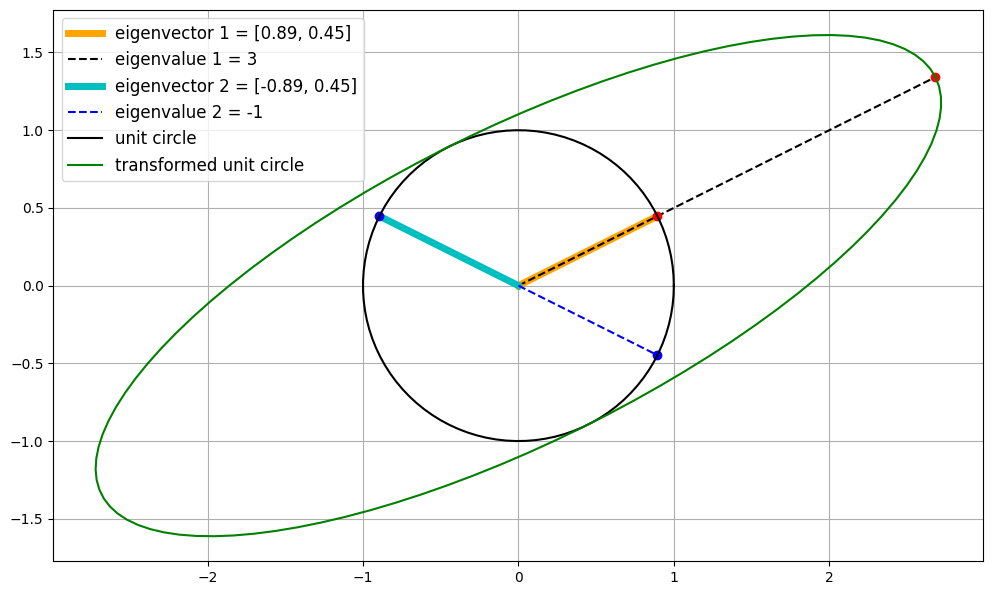

The eigenvectors are not orthogonal


In [ ]:
M = np.array([[1, 4],
              [1, 1]])

# call the function we defined above
plot_ellipse(M)

## Repeated eigenvalues


In [ ]:
#NOTE: Here we could also define mA using numpy.identity(2).
mA = np.array([[1, 0],
               [0, 1]])

#NOTE: NumPy will give ALL eigenvalues, including the repeated ones.
(sEigValues, vEigVectors) = np.linalg.eig(mA)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

Eigenvalue # 1  is:  1.0
The corresponding eigenvector is:
 [1. 0.]
Eigenvalue # 2  is:  1.0
The corresponding eigenvector is:
 [0. 1.]


## Real and complex eigenvalues

**Slide 28**

NumPy prints out complex numbers in the form $c = a + bj$, where $j$ is the imaginary number. We can use `numpy.real(c)` and `numpy.imag(c)` to print the real and imaginary parts respectively.

In [ ]:
mA = np.array([[0, 1],
               [-1, 0]])

sEigValues = np.linalg.eigvals(mA)
print("The eigenvalues of A are:", sEigValues)
print("The real part of the first eigenvalue is:", np.real(sEigValues[0]))
print("The imaginary part of the first eigenvalue is:", np.imag(sEigValues[0]))

The eigenvalues of A are: [0.+1.j 0.-1.j]
The real part of the first eigenvalue is: 0.0
The imaginary part of the first eigenvalue is: 1.0


## Example eigenvalue problem

**Slide 30**

In [ ]:
mM = np.array([[3, -1],
               [-1, 3]])

(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, "is:", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

Eigenvalue # 1 is: 1j
The corresponding eigenvector is:
 [0.70710678+0.j         0.        +0.70710678j]
Eigenvalue # 2 is: -1j
The corresponding eigenvector is:
 [0.70710678-0.j         0.        -0.70710678j]


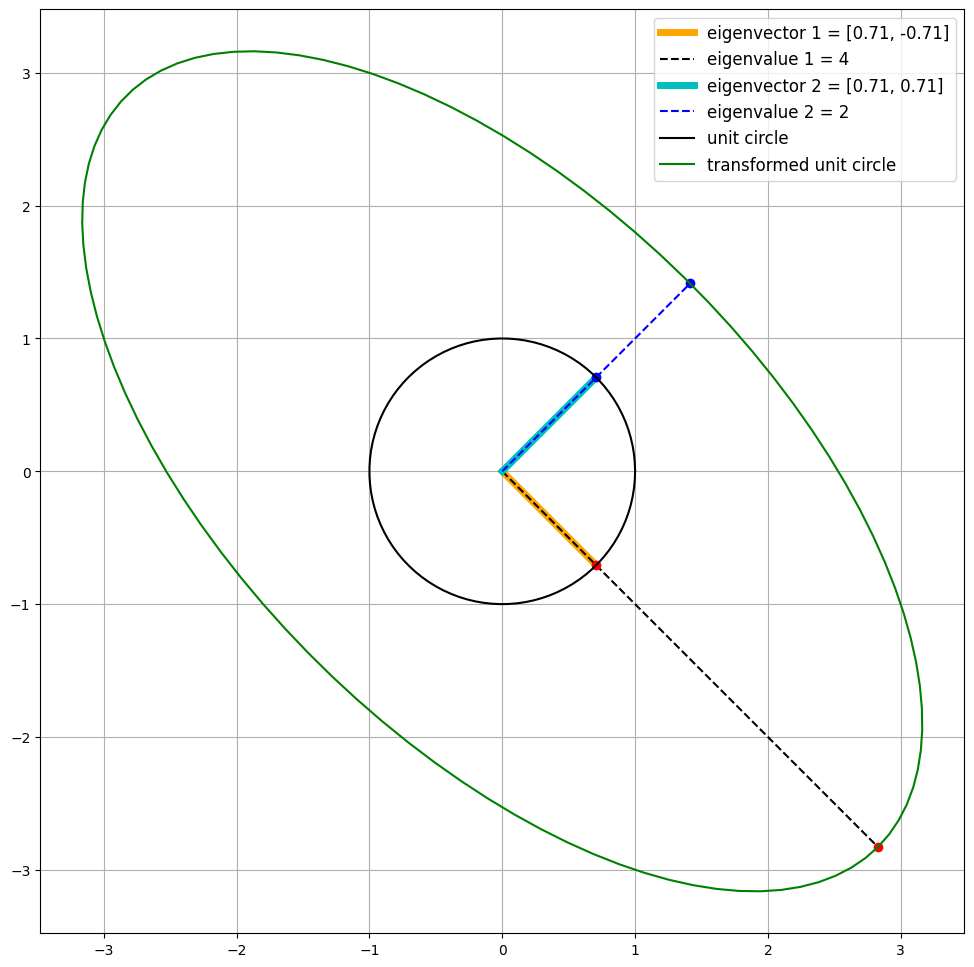

The eigenvectors are orthogonal


In [ ]:
M = np.array([[3, -1],
              [-1, 3]])

# call the function we defined above
plot_ellipse(M)

## Symmetric matrices

**Slide 31**

Unfortunately, because referencing a column of the matrix vEigVectors also returns another array data type (essentially a 'sub-array' of vEigVectors), we cannot use the `numpy.dot` function (which only operates on vectors/1D arrays). Instead, we'll simply use `numpy.transpose` to perform the dot product instead.

Note: We could also use [`numpy.vdot`](https://numpy.org/doc/stable/reference/generated/numpy.vdot.html) - read the documentation for more info.

In [ ]:
mNonSymmetric = np.array([[1, 4],
                          [1, 1]])

(sEigValues, vEigVectors) = np.linalg.eig(mNonSymmetric)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, "is:", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

print("The dot product of the two eigenvectors is:", np.transpose(vEigVectors[:,0]) @ vEigVectors[:,1])

Eigenvalue # 1 is: 3.0000000000000004
The corresponding eigenvector is:
 [0.89442719 0.4472136 ]
Eigenvalue # 2 is: -0.9999999999999996
The corresponding eigenvector is:
 [-0.89442719  0.4472136 ]
The dot product of the two eigenvectors is: -0.6000000000000001


Above, the dot product of the two eigenvectors was different from zero.

Below, the dot product should be zero as the two eigenvectors are orthogonal for any symmetric matrix.

In [ ]:
mSymmetric = np.array([[3, -1],
                       [-1, 3]])

(sEigValues, vEigVectors) = np.linalg.eig(mSymmetric)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

print("The dot product of the two eigenvectors is: ", np.transpose(vEigVectors[:,0]) @ vEigVectors[:,1])

Eigenvalue # 1  is:  4.0
The corresponding eigenvector is:
 [ 0.70710678 -0.70710678]
Eigenvalue # 2  is:  2.0
The corresponding eigenvector is:
 [0.70710678 0.70710678]
The dot product of the two eigenvectors is:  0.0


## Eigenvalue problem for a $3 \times 3$ matrix

**Slide 37**

In [ ]:
mM = np.array([[2, 2, 1],
               [1, 3, 1],
               [1, 2, 2]])

(sEigValues, vEigVectors) = np.linalg.eig(mM)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, " is: ", sEigValues[i])
    print("The corresponding eigenvector is:\n", vEigVectors[:,i])

Eigenvalue # 1  is:  5.000000000000001
The corresponding eigenvector is:
 [-0.57735027 -0.57735027 -0.57735027]
Eigenvalue # 2  is:  0.9999999999999999
The corresponding eigenvector is:
 [-0.90453403  0.30151134  0.30151134]
Eigenvalue # 3  is:  1.0000000000000002
The corresponding eigenvector is:
 [ 0.82529864 -0.52125218  0.21720572]


If the values of $x_1, x_2$ or $x_3$ are 'free' (i.e. can be chosen arbitrarily to obtain an independent eigenvector), NumPy does not necessarily choose values of 0 or 1, which is why the eigenvectors printed out here are different from those in your notes. They still satisfy the equation $ (A - \lambda I) \mathbf{x} = 0$ and are still independent eigenvectors.

# 6 Linear Algebra in Python



## Motivation

Linear algebra is of vital importance in almost any area of science and engineering and therefore numerical linear algebra is just as important in computational science. Some of the more popular areas of application include machine learning, computer vision, finite element method, optimisation, and many others.

Computers use a discrete representation of the real numbers, rather than a continuous one, which has several consequences. Most notably, it means that there have to be gaps between adjacent numbers. We will therefore most often want to work with [floating point numbers with double precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) (*float* in python) which allow us to represent real numbers with very high precision. However, often in computing we deal with extremely large datasets (e.g. matrices with millions of rows and columns) so even tiny errors can grow and accumulate very fast if our algorithm is [*numerically unstable*](https://en.wikipedia.org/wiki/Numerical_stability).

For example, we might be tempted to solve $A \mathbf{x} = \mathbf{b}$ by calculating an inverse of A, but calculating inverses and determinants of matrices is generally avoided in computing due to round-off errors. Numerical linear algebra therefore aims to come up with fast and efficient algorithms to solve usual linear algebra problems without magnifying these (and other) small errors.

## Python

The main library for linear algebra in Python is [SciPy](https://www.scipy.org/) which makes use of NumPy arrays. NumPy also provides plenty of basic functionalities through its functions in [``numpy.linalg``](https://numpy.org/doc/stable/reference/routines.linalg.html), but many advanced capabilities remain reserved for [``scipy.linalg``](https://docs.scipy.org/doc/scipy/reference/linalg.html).

In [ ]:
import numpy as np
import numpy.linalg as la

## Constructing some useful matrices

### Identity matrix

NumPy provides us with two almost identical functions to construct identity matrices: ``numpy.identity(n)`` and ``numpy.eye(n, [m=n], [k=0])``. The former constructs a square matrix with n rows and columns with 1s on the main diagonal. The latter constructs an $n \times m$ matrix with 1s on the kth diagonal (k=0 is the main diagonal). Examples below demonstrate this:

In [ ]:
print('identity(5) = \n', np.identity(5))  # square 5x5 matrix
print('\neye(4, 5) = \n', np.eye(4, 5))  # 4x5 matrix
print('\neye(4, 5, -1) = \n', np.eye(4, 5, -1))  # 1st lower diagonal
print('\neye(4, 5, 2) = \n', np.eye(4, 5, 2))  # 2nd upper diagonal

identity(5) = 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

eye(4, 5) = 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]

eye(4, 5, -1) = 
 [[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

eye(4, 5, 2) = 
 [[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Diagonal matrix

The function [``numpy.diag(array, [k=0])``](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) either extracts a diagonal from an array or constructs a diagonal array:

1. if the input array is 2-D, returns a 1-D array with diagonal entries
2. if the input array is 1-D, returns a diagonal 2-D array with entries from the input array on the diagonal.

In [ ]:
M = np.array([[1, 2],
              [3, 4]])
v = np.array([6, 8])

print('diag(M) = ', np.diag(M))
print('diag(v) = \n', np.diag(v))

diag(M) =  [1 4]
diag(v) = 
 [[6 0]
 [0 8]]


### Example: tridiagonal matrix

Let us show how we could use ``numpy.diag`` to construct a tridiagonal matrix, which is a banded matrix with non-zero entries on the main diagonal and the first off-diagonals above and below the main diagonal.

In [ ]:
a = [1, 1, 1]
b = [2, 2, 2, 2]
c = [3, 3, 3]

A = np.diag(a, -1) + np.diag(b, 0) + np.diag(c, 1)

print(A)

[[2 3 0 0]
 [1 2 3 0]
 [0 1 2 3]
 [0 0 1 2]]


### Triangular matrix

To construct upper or lower triangular matrices we use ``numpy.triu(array, [k=0])`` or ``numpy.tril(array, [k=0])`` functions (u stands for upper, l stands for lower). Returns an array whose entries below or above the kth diagonal are 0 (k=0 is the main diagonal).

In [ ]:
M = np.arange(1, 13).reshape(4, 3)
print('M = \n', M)

print('\ntriu(M) = \n', np.triu(M))
print('\ntriu(M, -1) = \n', np.triu(M, -1))
print('\ntril(M, 1) = \n', np.tril(M, 1))

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

triu(M) = 
 [[1 2 3]
 [0 5 6]
 [0 0 9]
 [0 0 0]]

triu(M, -1) = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]

tril(M, 1) = 
 [[ 1  2  0]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


## Sparse matrices

A sparse matrix is a matrix with mostly zero-valued entries. Performing operations on sparse matrices can therefore be unnecessarily computationally expensive, since we are unnecessarily adding 0s or multiplying by 0, for example. Therefore, when working with sparse matrices we would like to have an option to simply skip this kind of operations.

The identity matrix and diagonal matrices are examples of such matrices, although a sparse matrix does not need to have any particular structure. The non-zero entries could be completely random, and this is most often the case in practice.

SciPy allows us to build such matrices and do operations on them with the [``scipy.sparse``](https://docs.scipy.org/doc/scipy/reference/sparse.html) package. There are several formats how these matrices are stored and users are encouraged to read the documentation and the [Wikipedia page](https://en.wikipedia.org/wiki/Sparse_matrix) for an explanation of them. For example, a sparse matrix in coordinate format is stored in three arrays: one for the values of non-zero entries and two for the row and column index of those entries.

### Examples: Convert a NumPy array

We can convert any array to a sparse matrix. For example, we can use the function [`scipy.sparse.coo_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) to construct a matrix in COOrdinate format. Let us convert a tridiagonal NumPy matrix to a sparse SciPy matrix.

In [ ]:
from scipy.sparse import coo_matrix


a, b, c = [1] * 9, [2] * 10, [3] * 9

A = np.diag(a, -1) + np.diag(b, 0) + np.diag(c, 1)
print(A)

spA = coo_matrix(A)
print(spA)

[[2 3 0 0 0 0 0 0 0 0]
 [1 2 3 0 0 0 0 0 0 0]
 [0 1 2 3 0 0 0 0 0 0]
 [0 0 1 2 3 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0 0]
 [0 0 0 0 1 2 3 0 0 0]
 [0 0 0 0 0 1 2 3 0 0]
 [0 0 0 0 0 0 1 2 3 0]
 [0 0 0 0 0 0 0 1 2 3]
 [0 0 0 0 0 0 0 0 1 2]]
  (0, 0)	2
  (0, 1)	3
  (1, 0)	1
  (1, 1)	2
  (1, 2)	3
  (2, 1)	1
  (2, 2)	2
  (2, 3)	3
  (3, 2)	1
  (3, 3)	2
  (3, 4)	3
  (4, 3)	1
  (4, 4)	2
  (4, 5)	3
  (5, 4)	1
  (5, 5)	2
  (5, 6)	3
  (6, 5)	1
  (6, 6)	2
  (6, 7)	3
  (7, 6)	1
  (7, 7)	2
  (7, 8)	3
  (8, 7)	1
  (8, 8)	2
  (8, 9)	3
  (9, 8)	1
  (9, 9)	2


In the above example, A has 100 entries, while spA ('sparse A') has only 28. In this case we would not save much computational time since a $10 \times 10$ matrix is quite small. However, sparse matrices become more useful (and even essential) the larger our matrix is.

### Examples: Construct a tridiagonal matrix

Users more comfortable with SciPy may wish to directly construct sparse matrices, instead of converting a NumPy array. Let us construct the same tridiagonal matrix as in the previous example.

In [ ]:
from scipy.sparse import diags


diagonals = [[1] * 9, [2] * 10, [3] * 9]

A = diags(diagonals, [-1, 0, 1], format='coo')
print(A.toarray())  # print the entire array
print(A)

[[2. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 2. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 2. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 2. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]]
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 6)	1.0
  (8, 7)	1.0
  (9, 8)	1.0
  (0, 0)	2.0
  (1, 1)	2.0
  (2, 2)	2.0
  (3, 3)	2.0
  (4, 4)	2.0
  (5, 5)	2.0
  (6, 6)	2.0
  (7, 7)	2.0
  (8, 8)	2.0
  (9, 9)	2.0
  (0, 1)	3.0
  (1, 2)	3.0
  (2, 3)	3.0
  (3, 4)	3.0
  (4, 5)	3.0
  (5, 6)	3.0
  (6, 7)	3.0
  (7, 8)	3.0
  (8, 9)	3.0


## Matrix operations

### Arithmetic operations

All arithmetic operators (``+``, ``-``, ``*``, ``/ ``, ``%``, ``**``, ``//``) on arrays apply elementwise. If both operands are matrices they need to have the same dimensions (to be conformable for the operation).

In [ ]:
M = np.array([[1, 2],
              [3, 4]])

print('M =\n', M)
print('M + M =\n', M + M)  # add
print('M - M =\n', M - M)  # subtract
print('4 * M =\n', 4 * M)  # multiply by a scalar
print('M * M =\n', M * M)  # multiply matrices elementwise
print('M / M =\n', M / M)  # divide elementwise
print('M ** 3 =\n', M ** 3)  # exponentiation elementwise (M**3 = M*M*M)
print('M % 2 =\n', M % 2)  # modulus
print('M // 2 =\n', M // 2)  # integer (floor) division

M =
 [[1 2]
 [3 4]]
M + M =
 [[2 4]
 [6 8]]
M - M =
 [[0 0]
 [0 0]]
4 * M =
 [[ 4  8]
 [12 16]]
M * M =
 [[ 1  4]
 [ 9 16]]
M / M =
 [[1. 1.]
 [1. 1.]]
M ** 3 =
 [[ 1  8]
 [27 64]]
M % 2 =
 [[1 0]
 [1 0]]
M // 2 =
 [[0 1]
 [1 2]]


### Matrix multiplication

NumPy uses the function [``numpy.matmul(array1, array2)``](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to multiply two matrices. Users of Python 3.5 or newer can use the operator ``@`` instead.

To raise a matrix to some power we need to use the function ``numpy.linalg.matrix_power(array, exp)``.

**Note:** When one of the operands is a 1-D array (we might initialise a vector this way if we are not careful - see below on reshaping arrays), it will automatically be assumed that it is a row vector if it is left-multiplying or a column vector if it is right-multiplying. The result will be a 1-D array as well.

In [ ]:
print('M @ M =\n', M @ M)
print('M @ M @ M =\n', M @ M @ M)
print('M^3 = \n', la.matrix_power(M, 3))

x = np.array([1, 2])  # 1-D array
print('x = ', x)

print('x @ M = \n', x @ M)
print('M @ x = \n', M @ x)

M @ M =
 [[ 7 10]
 [15 22]]
M @ M @ M =
 [[ 37  54]
 [ 81 118]]
M^3 = 
 [[ 37  54]
 [ 81 118]]
x =  [1 2]
x @ M = 
 [ 7 10]
M @ x = 
 [ 5 11]


### Inner product

The function [`` numpy.dot(array1, array2) ``](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) is an alternative matrix product function but we recommend using it only for calculating an inner product of two vectors. Curious readers are encouraged to read the documentation for other uses, although `@` is preferred.

In [ ]:
x = np.array([1, 2])
y = np.array([3, 4])

print(np.dot(x, y))

11


### Transpose

A matrix can be transposed using ``numpy.transpose(array)`` or with the array attribute ``array.T``.

In [ ]:
print('M.T = \n', M.T)
print('numpy.transpose(M) = \n', np.transpose(M))

M.T = 
 [[1 3]
 [2 4]]
numpy.transpose(M) = 
 [[1 3]
 [2 4]]


#### Reshaping arrays

Note that 1-D NumPy arrays remain unchanged when transposed. To avoid this kind of issues, column (or row) vectors should be initialised as 2-D $n \times 1$ (or $1 \times n$) arrays. Below demonstrates this, as well as how to reshape 1-D arrays to 2-D. A very useful method of doing this is by giving -1 as one of the new shape parameters. We cannot give -1 for more than one shape parameter, as this is the unknown value which NumPy will figure out for us. For example, if we start from a 1-D array of 4 entries, reshaping it to (-1, 1, 2) will generate an array of shape $k \times 1 \times 2$ where $k \in \mathbb{N}$ has to satisfy $k \cdot 1 \cdot 2 = 4$ so that the total number of entries (A.size in NumPy) is preserved. If this $k$ does not exist, the reshaping is not possible.

In [ ]:
import numpy as np

x = np.array([1., 2., 3.])
print('x =', x, ', number of dimensions: ', x.ndim, ', shape:', x.shape)
print('x.T =', x.T)

x = np.array([[1., 2., 3.]])
print('x =', x, ', number of dimensions: ', x.ndim, ', shape:', x.shape)
print('x.T = \n', x.T)

x = np.array([1., 2., 3.]).reshape(-1, 1)  # reshape
print('[1., 2., 3.].reshape(-1, 1) = \n', x, ', number of dimensions: ', x.ndim, ', shape:', x.shape)

x = [1. 2. 3.] , number of dimensions:  1 , shape: (3,)
x.T = [1. 2. 3.]
x = [[1. 2. 3.]] , number of dimensions:  2 , shape: (1, 3)
x.T = 
 [[1.]
 [2.]
 [3.]]
[1., 2., 3.].reshape(-1, 1) = 
 [[1.]
 [2.]
 [3.]] , number of dimensions:  2 , shape: (3, 1)


### Complex conjugate

We use ``numpy.conjugate(array)`` or its alias ``numpy.conj(array)`` to find the complex conjugate of an array containing complex entries. Alternatively we can use the ``.conj()`` attribute of NumPy arrays.

To get the conjugate transpose (or Hermitian transpose) we would therefore write ``array.T.conj()``.

In [ ]:
C = np.array([[1 + 1j, 2 + 2j],
              [3 + 3j, 4 + 4j]])

print('C = \n', C)
print('conj(C) = \n', np.conj(C))
print('C.conj() = \n', C.conj())

print('\nC.T.conj() = \n', C.T.conj())

C = 
 [[1.+1.j 2.+2.j]
 [3.+3.j 4.+4.j]]
conj(C) = 
 [[1.-1.j 2.-2.j]
 [3.-3.j 4.-4.j]]
C.conj() = 
 [[1.-1.j 2.-2.j]
 [3.-3.j 4.-4.j]]

C.T.conj() = 
 [[1.-1.j 3.-3.j]
 [2.-2.j 4.-4.j]]


## Norms

The function [``numpy.linalg.norm(array, [order])``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) returns a matrix or vector norm of specified order. If the order is not specified, it returns the Frobenius matrix norm (or 2-norm for vectors).

In [ ]:
x = np.array([1, 2, 3])
M = np.array([[1, 2],
              [3, 4]])

print('x = ', x)
print('M = \n', M)

print('\nnorm(x, 1) = ',la.norm(x, 1))
print('norm(x) = ', la.norm(x))
print('norm(x, np.inf)', la.norm(x, np.inf))

print('\nnorm(M)', la.norm(M))
print('norm(M, np.inf)', la.norm(M, np.inf))

x =  [1 2 3]
M = 
 [[1 2]
 [3 4]]

norm(x, 1) =  6.0
norm(x) =  3.7416573867739413
norm(x, np.inf) 3.0

norm(M) 5.477225575051661
norm(M, np.inf) 7.0


## Matrix inverse

We can find the inverse of a square matrix with the function [``numpy.linalg.inv(array)``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html). As briefly mentioned in the motivation section, an inverse of large matrix is very likely to be imprecise due to round-off errors. However, we might be able to get away with it with certain smaller matrices.

In [ ]:
print('inverse(M) = \n', la.inv(M))

inverse(M) = 
 [[-2.   1. ]
 [ 1.5 -0.5]]


## Solving systems of linear equations

We will most often want to solve a linear matrix equation $A \mathbf{x} = \mathbf{b}$.

As briefly mentioned in the motivation section, we should not solve this by finding an inverse $A^{-1}$ and then multiplying $A^{-1}\mathbf{b}$ to find $\mathbf{x}$.

NumPy provides us with a function [`numpy.linalg.solve(A, b)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which will solve the equation for $\mathbf{x}$ but it does it in a different way (see LU decomposition at the end of the notebook). It is required that $A$ is not singular. For singular matrices we need to use the least-squares method.

In [ ]:
A = np.array([[3., 5., -1.],
              [1., 4., 1.],
              [9., 0., 2.]])
b = np.array([10, 7, 1])

x = np.linalg.solve(A, b)
print(x)

[ 0.2  1.8 -0.4]


### Example: Runge-Kutta, Wave equation

Consider the 1-D wave equation

$$ u_{tt} + u_{xx} = 0, \qquad u(0) = u(L) = 0,$$

in the domain [0, L]. To solve it, let us write a standard explicit second order Runge-Kutta time-stepping algorithm. First, we need to discretise the equation with a finite difference approximation,

$$ \frac{\partial^2}{\partial t^2} u_i - \frac{u_{i-1} -2u_i + u_{i+1}}{\Delta x^2} = 0, \qquad u_0 = u_{N+1}=0,$$

where $\Delta x = L / (N + 1)$ and $u_i = u(x_i) = u(i \Delta x)$, $i = 1, \dots, N$. Writing $\mathbf{v} = (u_1, u_2, \dots, u_N)^T$, we can express this equation as:

$$ \frac{\partial^2}{\partial t^2} \mathbf{v} + A \mathbf{v} = 0, $$

where $A$ is an $N \times N$ tridiagonal coefficient matrix:

$$ A = \frac{1}{\Delta x^2}
    \begin{bmatrix}
         2& -1  & 0 &\cdots & 0 & 0\\
        -1& 2   & -1 &\cdots & 0 & 0\\
        0 & -1 & 2 & \cdots & 0 & 0 \\
           &\vdots&&&\vdots&\vdots\\
        0 & 0 & 0 & \cdots & 2 & -1 \\
        0 & 0 & 0 & \cdots & -1 & 2 \\
    \end{bmatrix}. $$
    
Now we begin to see how linear algebra can be used to solve our PDE. We want to solve an ODE, so we introduce $\mathbf{w} = dv / dt$




    

 u(x, 0) = {\rm e}^{-x^2}, u_t(x, 0) = 0

In [ ]:
from scipy.sparse import diags

n = 10
vals = np.array([-np.ones(n-1), 2*np.ones(n), -np.ones(n-1)]) #/ dx**2
A = diags(vals, [-1, 0, 1])
print(A.toarray())

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


<ipython-input-17-5dc4c59202c9>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vals = np.array([-np.ones(n-1), 2*np.ones(n), -np.ones(n-1)]) #/ dx**2


## Further reading

Trefethen, L.N. and Bau III, D., 1997. Numerical linear algebra (Vol. 50). Siam.

### QR and LU decomposition

The most common method for finding a numerical solutions of an equation $A \mathbf{x} = \mathbf{b}$ make use of [QR](https://en.wikipedia.org/wiki/QR_decomposition) and [LU decompositions](https://en.wikipedia.org/wiki/LU_decomposition).

**QR decomposition** (or factorisation) decomposes a matrix $A$ into a product $A = QR$, where $Q$ is an orthogonal (or unitary if complex) matrix and $R$ is upper-triangular. An orthogonal matrix $Q$ is a matrix whose transpose is equal to its inverse, i.e. $Q^T = Q^{-1}$. Having found $Q$ and $R$, solving the equation is then performed via a simple back-substitution because the LHS is upper-triangular:

$$ A \mathbf{x} = \mathbf{b} \\
QR \mathbf{x} = \mathbf{b} \\
R \mathbf{x} = Q^T \mathbf{b}. $$

Hence we got away with calculating an inverse of $A$, but rather we found an inverse of $Q$ which does not require any further calculations.

**LU decomposition** factorises $A$ such that $A = LU$ where $L$ is a lower-triangular matrix and $U$ is an upper triangular matrix.

$$ A \mathbf{x} = \mathbf{b} \\
LU \mathbf{x} = \mathbf{b} $$

First we solve $ L \mathbf{y} = \mathbf{b}$ for $\mathbf{y}$, where $\mathbf{y} = U\mathbf{x}$ and then we solve $U\mathbf{x} = \mathbf{y}$ for $\mathbf{x}$. It is very simple to solve these two equations since solving triangular systems involves only back- or forward- substitution.

# 7 Matrices


## Defining a matrix

Remember: when stating the dimension of a matrix (e.g. $3 \times 3$, $2 \times 4$, etc) it's **R**ows Fi**R**st, **C**olumns Se**C**ond.

Define matrices using `numpy.array`, and find their dimensions using `numpy.shape`.

In [ ]:
# import necessary modules
import numpy as np

# mA is a SQUARE matrix
mA = np.array([[2, 3, -4],
                [3, -1, 2],
                [4, 2, 2]])

# mB is a NON-SQUARE matrix
mB = np.array([[2, -4, 1, -2],
               [7, 8, 0, 3]])

# So, mA is 3 x 3 matrix, mB is a 2 x 4 matrix.

print("The dimension of A is", np.shape(mA))
print("The dimension of B is", np.shape(mB))

The dimension of A is (3, 3)
The dimension of B is (2, 4)


## Matrix-scalar multiplication

**Slide 5**

In [ ]:
mD = np.matrix([[2, -4, 1, -2],
                [7, 8, 0, 3]])

print("3*D =")
print(3*mD)

3*D =
[[  6 -12   3  -6]
 [ 21  24   0   9]]


## Matrix addition and subtraction


In [ ]:
mE = np.array([[2, -4],
               [7, 8]])

mF = np.array([[4, 0],
               [2, -1]])

print("E + F =")
print(mE + mF)

print("E - F =")
print(mE - mF)

E + F =
[[ 6 -4]
 [ 9  7]]
E - F =
[[-2 -4]
 [ 5  9]]


The two matrices being added together must have the same dimension. If they do not, Python will give `ValueError`.

Adding mE ( $2 \times 2$ ) and mB ( $2 \times 4$ ):

In [ ]:
print(mE + mB)

ValueError: ignored

## Matrix-matrix multiplication


Matrix-matrix multiplication of two numpy arrays is performed with the `@` operator.

In [ ]:
mE = np.array([[2, -4],
               [7, 8],
               [3, 2]])
mH = np.array([[4, 0, 0, 1],
               [2, -1, 3, -2]])

print("E @ H =")
print(mE @ mH)

E @ H =
[[  0   4 -12  10]
 [ 44  -8  24  -9]
 [ 16  -2   6  -1]]


## Matrix transpose

Finding the transpose of a matrix using `numpy.transpose`.

In [ ]:
# Non-square matrix
mB = np.array([[2, -4],
               [7, 8],
               [3, 2]])

mB_transpose = np.transpose(mB)
print("The transpose of (non-square) B =")
print(mB_transpose)

# Square matrix
mB = np.array([[2, 3, -4],
               [3, -1, 2],
               [4, 2, 2]])

mB_transpose = np.transpose(mB)
print("The transpose of (square) B =")
print(mB_transpose)

The transpose of (non-square) B =
[[ 2  7  3]
 [-4  8  2]]
The transpose of (square) B =
[[ 2  3  4]
 [ 3 -1  2]
 [-4  2  2]]


## Identity matrix

Create identity matrix using `numpy.identity`.

In [ ]:
mI = np.identity(3)

print("I=")
print(mI)

mB = np.array([[2, 3, -4],
               [3, -1, 2],
               [4, 2, 2]])

mIB = mI @ mB
print("I @ B =")
print(mIB)

# mIB should be equal to mB
if np.allclose(mB, mIB) == True:
    print("B = I @ B")
else:
    print("Error")

I=
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
I @ B =
[[ 2.  3. -4.]
 [ 3. -1.  2.]
 [ 4.  2.  2.]]
B = I @ B


## Determinants

Finding determinants of matrices using `numpy.linalg.deg`

In [ ]:
# 2 x 2 example
mD = np.array([[1, 4],
               [-3, 5]])
sDet = np.linalg.det(mD)
print("det(D) = %.2f" % sDet)

# 3 x 3 example
mA = np.array([[1, 2, 4],
               [-3, 1, -2],
               [3, 2, 5]])
sDet = np.linalg.det(mA)
print("det(A) = %.2f" % sDet)

det(D) = 17.00
det(A) = -9.00


## Solving systems of linear equations

Find solutions of a system of linear equations of the form $ A \mathbf{x} = \mathbf{b} $ using `numpy.linalg.solve(A, b)`.

In [ ]:
# Set up a system of the form Ax = b
mA = np.array([[2, 3, -4],
               [3, -1, 2],
               [4, 2, 2]])
vb = np.array([10, 3, 8])

# Solve the system of linear equations
vX = np.linalg.solve(mA, vb)

print("The solution to Ax = b is:")
print(vX)

The solution to Ax = b is:
[ 1.86956522  1.04347826 -0.7826087 ]


## Existence of solutions

Is the solution above unique?

In [ ]:
# Compute the determinant of the square matrix A
sDet = np.linalg.det(mA)
print("Determinant of A = %.3f" % sDet)
if(sDet != 0):
    print("The system Ax = b has a UNIQUE solution.")
else:
    print("The system Ax = b has either infinite solutions or no solutions.")

Determinant of A = -46.000
The system Ax = b has a UNIQUE solution.


## Inverse of a matrix

Compute the inverse of a matrix using `numpy.linalg.inv`

In [ ]:
mA_inv = np.linalg.inv(mA)
print("The inverse of A is:")
print(mA_inv)

The inverse of A is:
[[ 0.13043478  0.30434783 -0.04347826]
 [-0.04347826 -0.43478261  0.34782609]
 [-0.2173913  -0.17391304  0.23913043]]


{note}
A is an object with a set of methods (you'll learn more about these in the Programming for Geophysicists course). Therefore, you could also use the method `getI()` to compute the inverse by typing

```python
A.getI()
```

Let us check that `A @ A_inv` gives the identity matrix I. Note: You may find that some elements of the matrix are around `1e-16` (i.e. $10^{-16}$ ) instead of exactly zero.

In [ ]:
print("A @ A_inv=")
print(mA @ mA_inv)

mI = np.identity(3)

if np.allclose(mI, mA @ mA_inv) == True:
    print("A*A_inv gives the identity matrix")
else:
    print("Error")

A @ A_inv=
[[ 1.00000000e+00  1.11022302e-16 -2.22044605e-16]
 [ 5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  5.55111512e-17  1.00000000e+00]]
A*A_inv gives the identity matrix
